In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from Code.Evaluation_functions import archetype_correlation,NMI,Ordinal_reconstuction
import os
import itertools
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
all_types=[0,10,9,20,5,14,2,7,18,11,17,6,15,8,19,4,13,1,16,3,12]

In [2]:
def plot_types(X,Z,alpha,beta,keys,indexes):
    fig,ax=plt.subplots(figsize=(30,30),sharex=True)
    ax.boxplot(X[:,indexes],labels=keys[indexes],positions=range(0,len(indexes)))
    ax.plot(Z.T[indexes],marker="o",linestyle="-",label=np.arange(1,Z.shape[0]+1))
    ax.legend()
    plt.hlines(beta[1:-1],-1,len(indexes),colors="black",linestyle='dotted')
    plt.yticks(alpha,["Very much like me","Like me","Some-what like me","A Little like me","Not like me","Not like me at all"],rotation=45,fontsize="17")
    
    plt.show()

In [3]:
#Load data
data_all=pd.read_csv(r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\Schmidt_et_al_2021_Latent_profile_analysis_of_human_values_SUPPL\VB_LPA\Data\ESS8_data.csv")
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
data=data_all[keys]

savedir=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\RealData"
K=4
times=3

In [39]:
data.columns
len(keys[all_types])

21

In [40]:
len(keys)

21

In [4]:
#load standard model 
#files=[f"K{K}_sample{i}OAA_Result" for i in range(times)] #OAA
files=[f"K{K}_sample{i}RB_Result" for i in range(times)] #RB OAA
sumfiles=[f"K{K}_sample{i}RB_summery" for i in range(times)]

ModelData=[]
Summerys=[]
for file in files:
    with open(os.path.join(savedir,file), "r") as file:
        ModelData.append(json.load(file))

for file in sumfiles:
    with open(os.path.join(savedir,file), "r") as file:
        Summerys.append(json.load(file))

In [280]:
pd.DataFrame([data for data in Summerys])

loss     Sigma  best_epokes      RunTime
0  797836.927135  0.065622          999  1321.159967
1  800118.842295  0.062093          998  1305.791502
2  797638.729111  0.066308          959  1292.695879

In [269]:
time=3
[(permutation, archetype_correlation(ModelData[permutation[0]]["A"],ModelData[permutation[1]]["A"])[2])
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.6953433374072407),
 ((0, 2), 0.7480683047772392),
 ((1, 0), 0.7526146585238597),
 ((1, 2), 0.9769978886644024),
 ((2, 0), 0.7760948805127146),
 ((2, 1), 0.9769978886644024)]

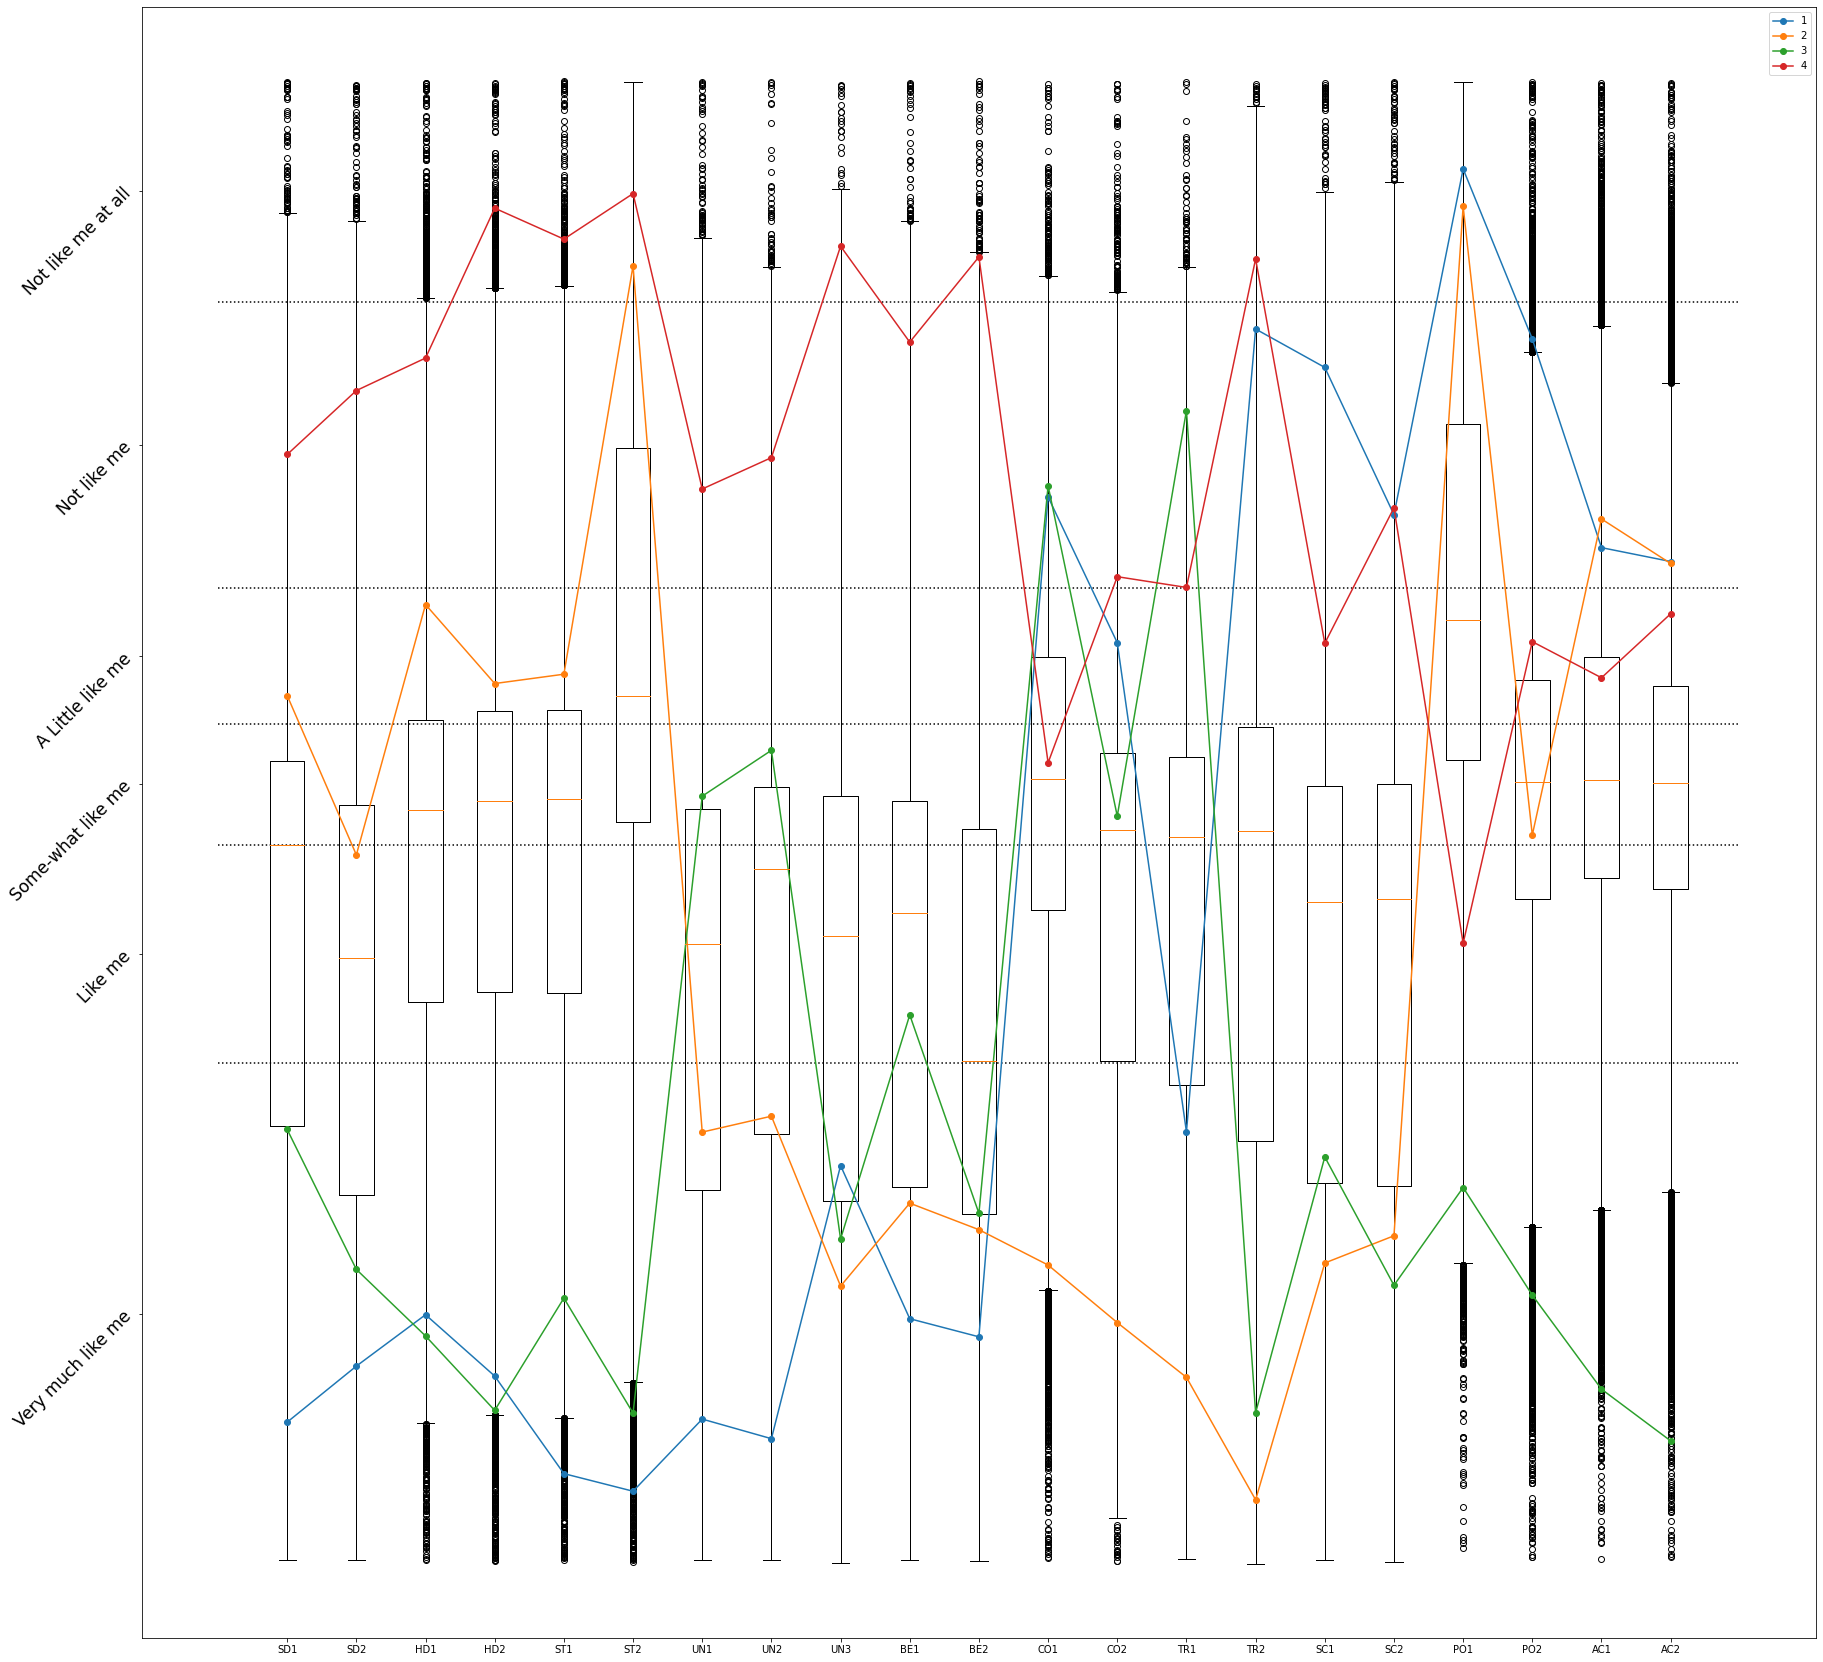

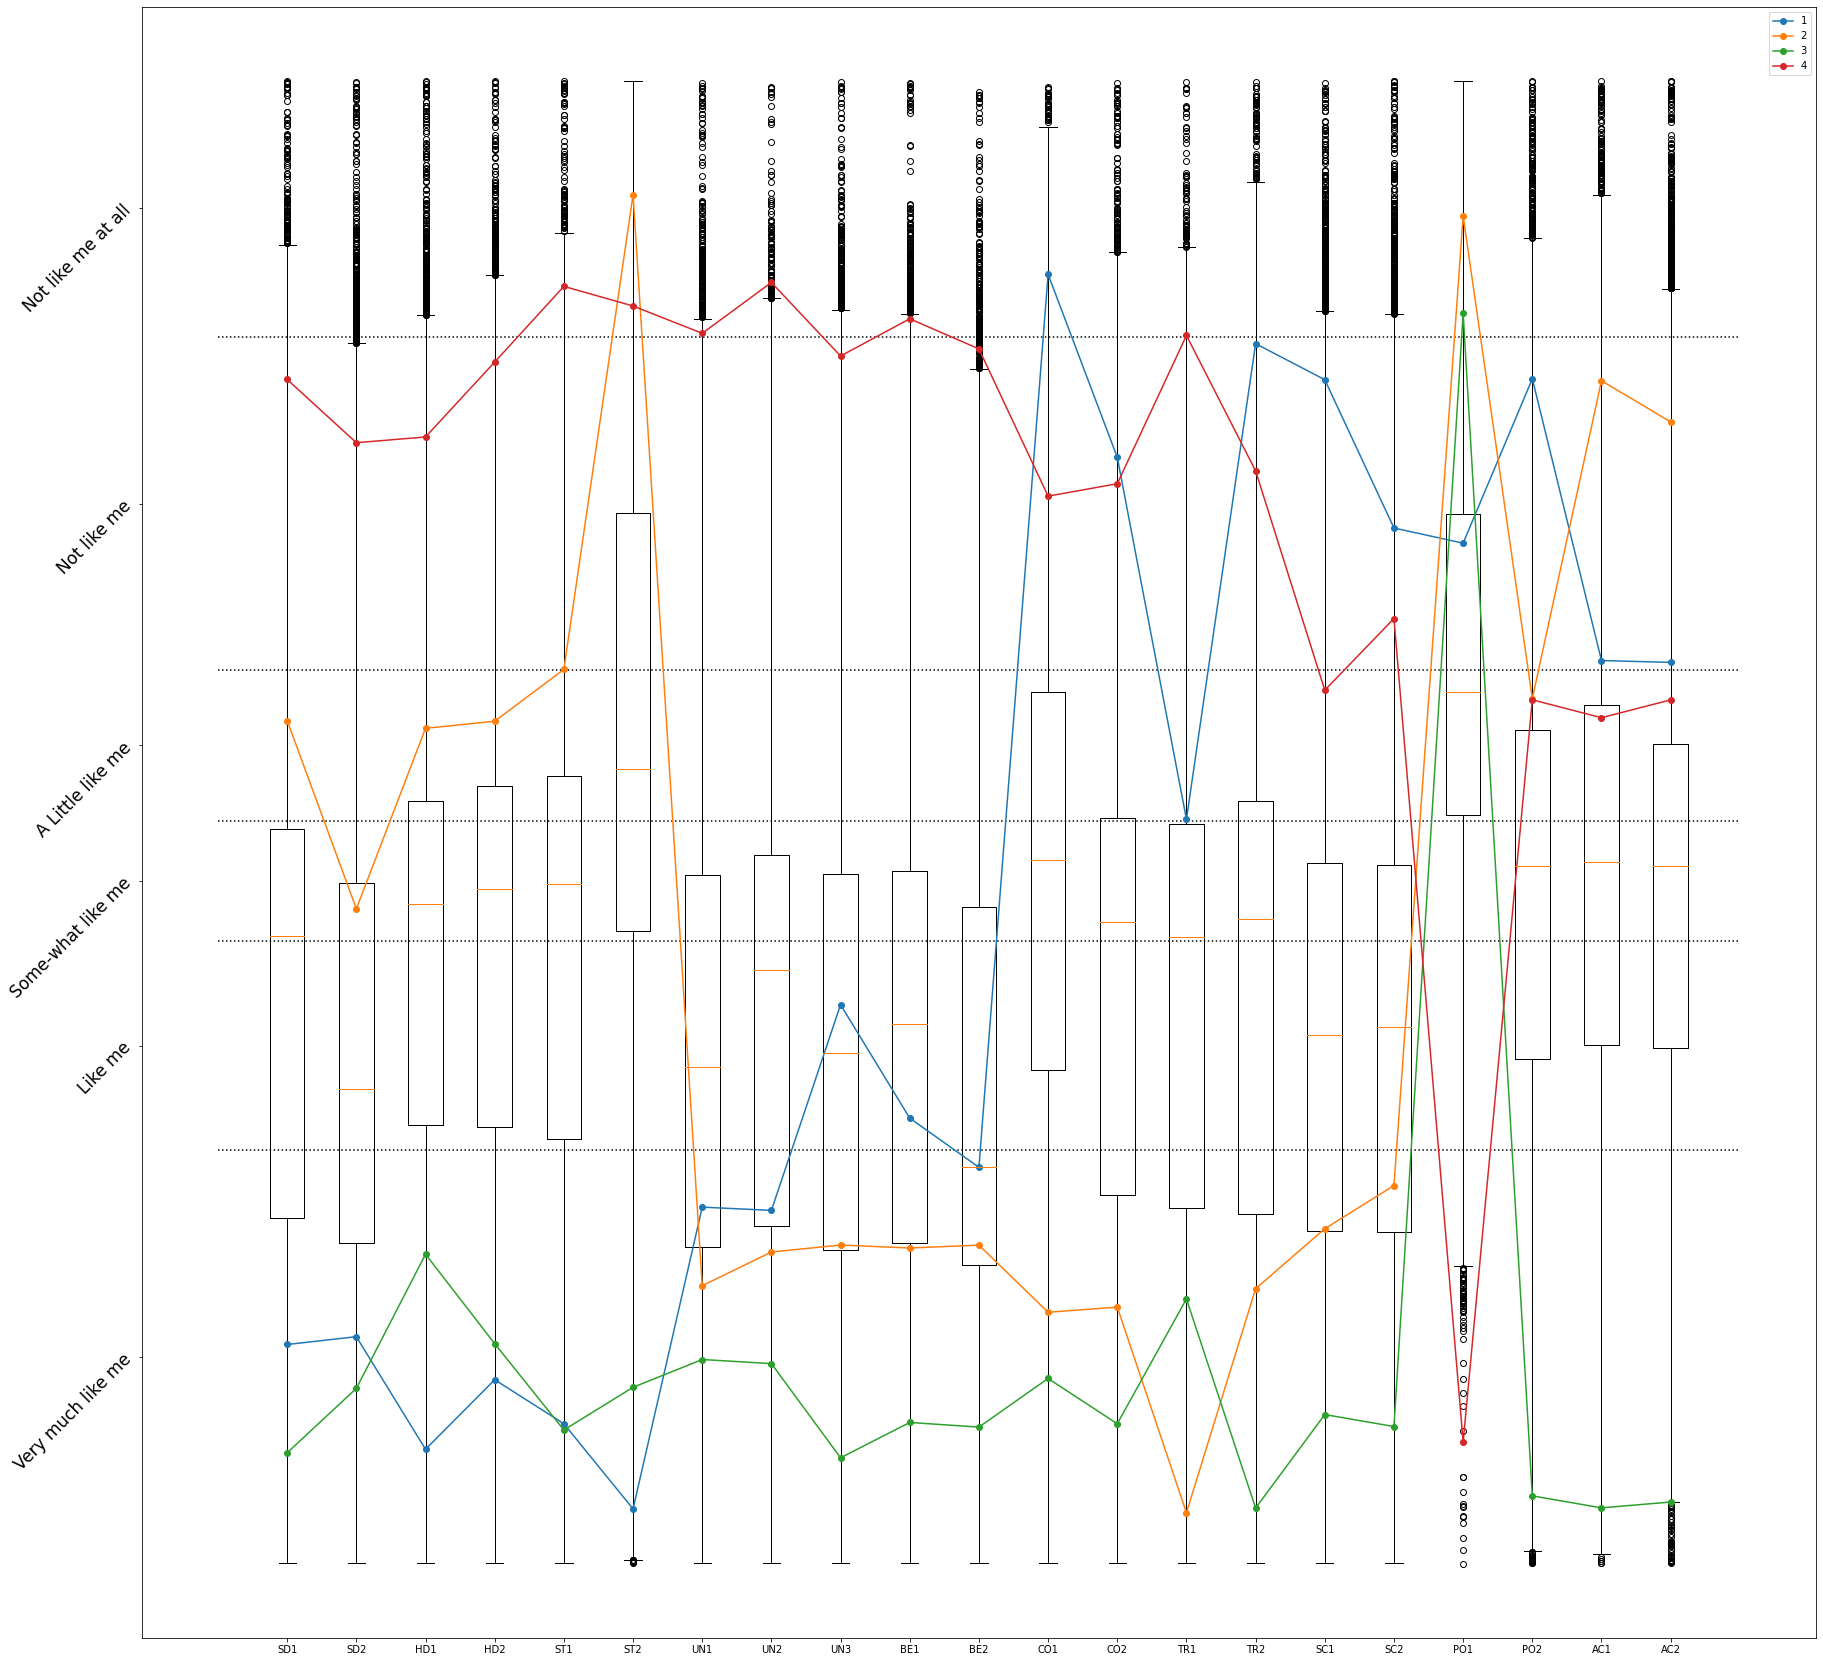

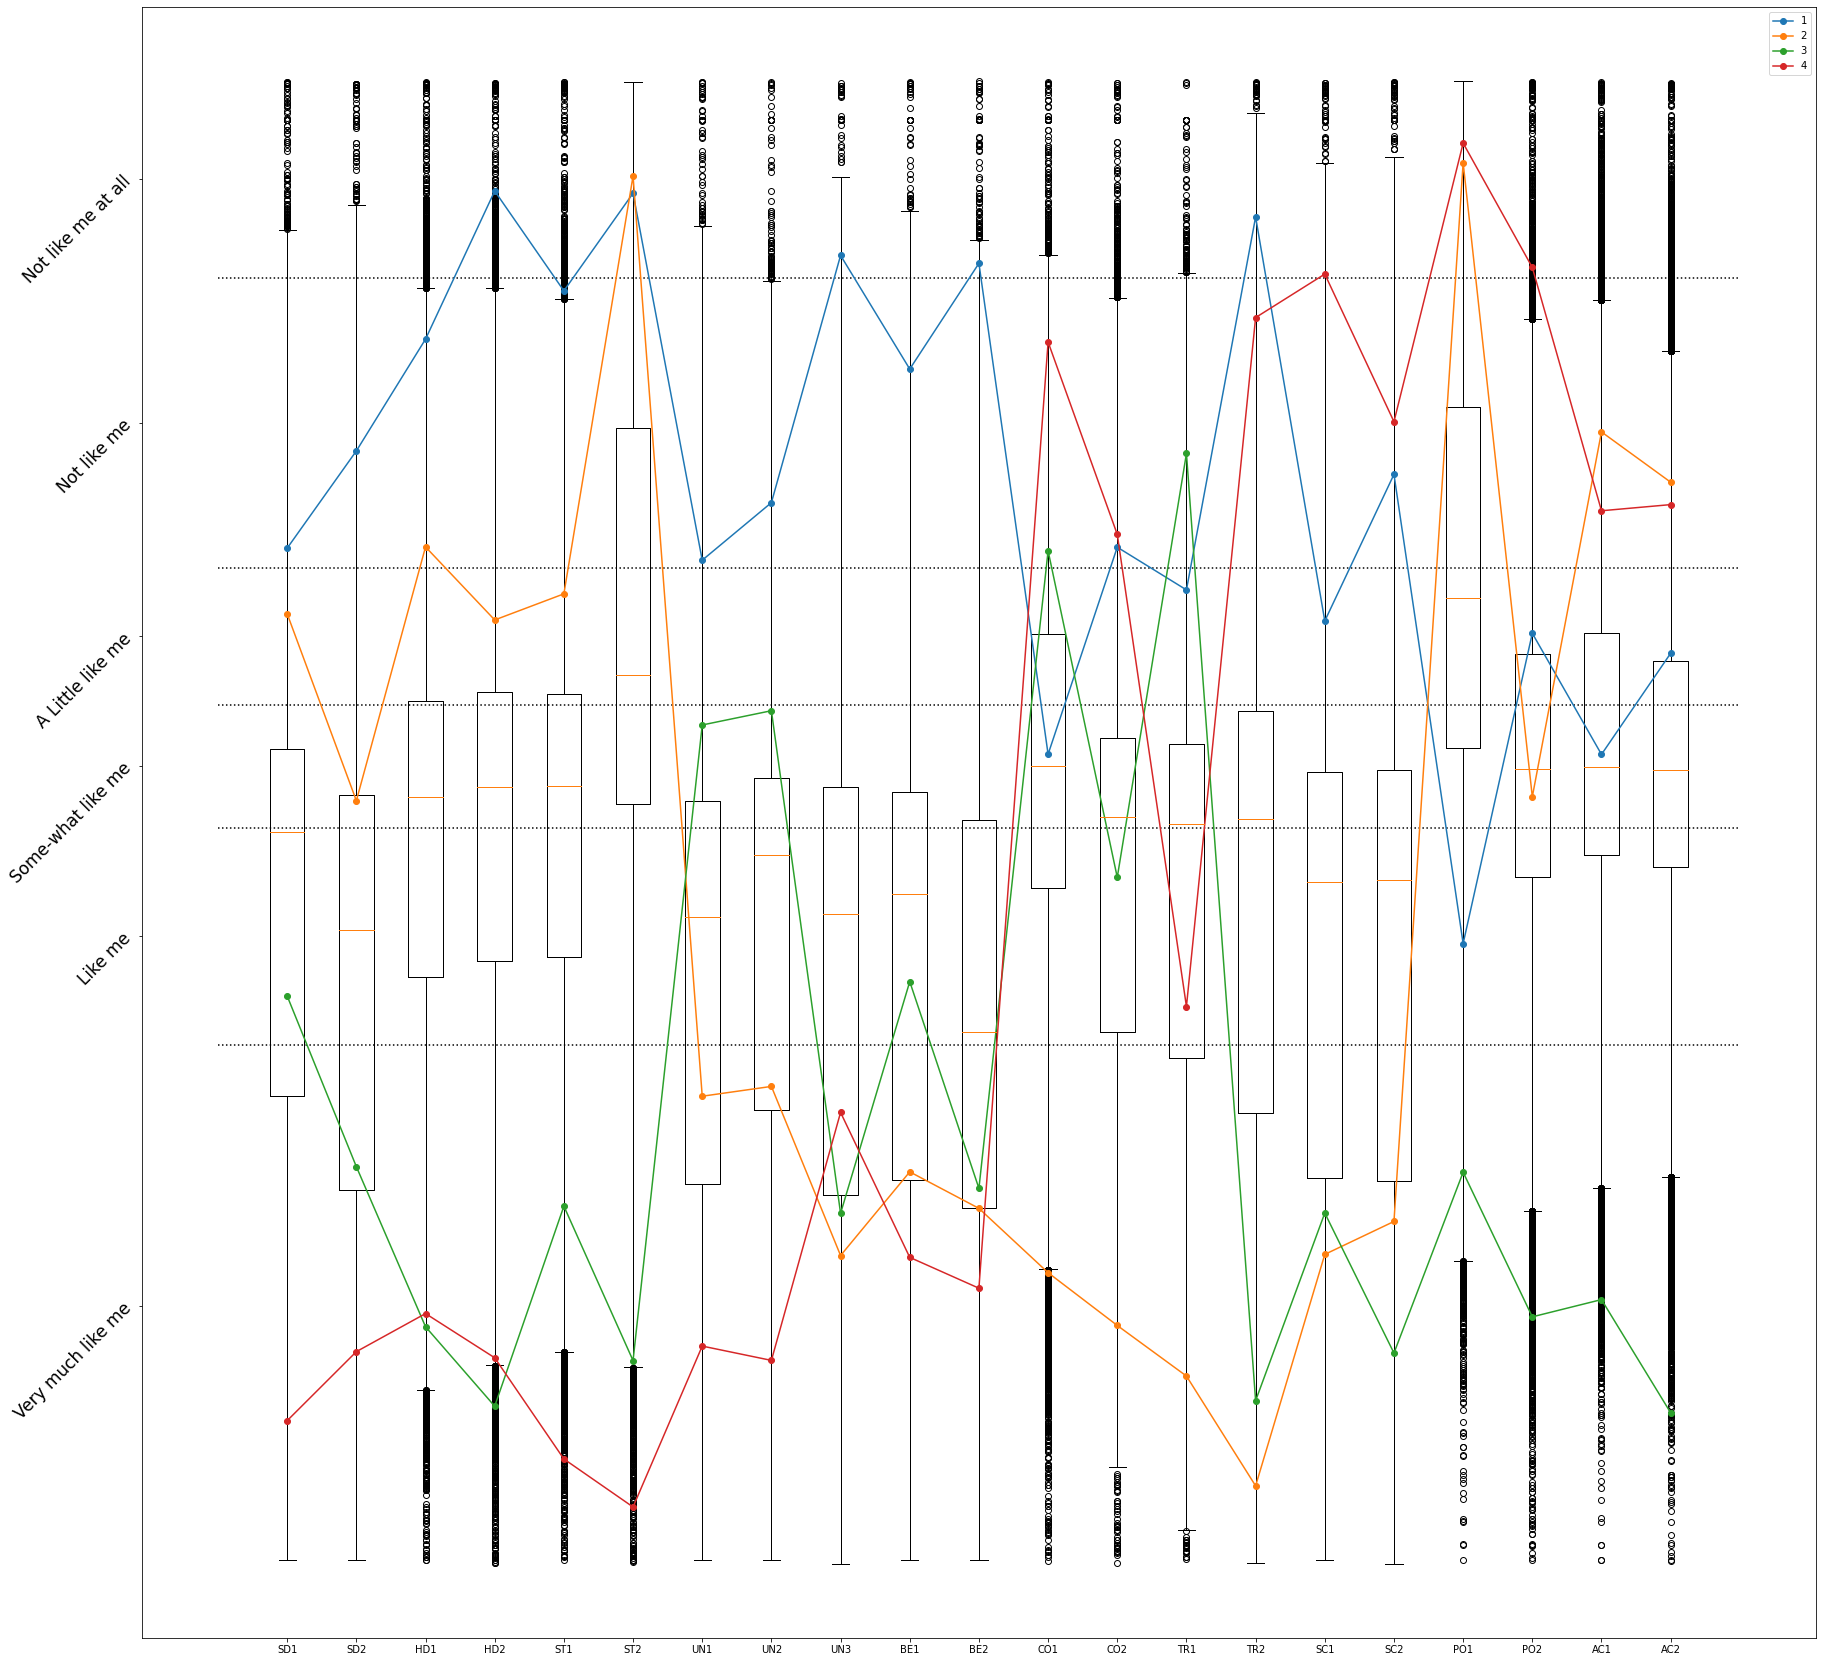

In [30]:
for i in range(3):

    Xhat=np.array(ModelData[i]['Xtilde'])
    A=np.array(ModelData[i]['A'])
    alpha=np.array(ModelData[i]['alpha']).mean(axis=0)
    beta=np.array(ModelData[i]['beta']).mean(axis=0)
    plot_types(Xhat,A,alpha,beta,keys,all_types)

In [27]:
data_all.columns

Index(['ID', 'Country', 'left_right', 'immigrants', 'homosexual',
       'Satisfy_life', 'Satisfy_health', 'Attitude2EU', 'gender', 'age',
       'education', 'subjective_income', 'SD1', 'PO1', 'UN1', 'AC1', 'SC1',
       'ST1', 'CO1', 'UN2', 'TR1', 'HD1', 'SD2', 'BE1', 'AC2', 'SC2', 'ST2',
       'CO2', 'PO2', 'BE2', 'UN3', 'TR2', 'HD2', 'TR_CFA', 'CO_CFA', 'SC_CFA',
       'HD_CFA', 'ST_CFA', 'SD_CFA', 'PO_CFA', 'AC_CFA', 'UN_CFA', 'BE_CFA',
       'SBM8', 'SBM9', 'SBM16', 'LCA5', 'LCA8', 'LCA16'],
      dtype='object')

In [6]:
i=2

In [7]:
def plot_atibutes(atributes,Z,alpha,beta,keys,indexes):
    fig,ax=plt.subplots(figsize=(30,30),sharex=True)
    ax.plot(atributes.to_numpy().T[indexes],marker="o",linestyle="-")
    legend1=plt.legend(atributes.index)
    ax.plot(Z.T[indexes],marker="o",linestyle="--",label=np.arange(1,Z.shape[0]+1))
    legend2=plt.legend(loc=4)
    plt.gca().add_artist(legend1)
    plt.hlines(beta[1:-1],-1,len(indexes),colors="black",linestyle='dotted')
    plt.xticks(np.arange(len(indexes)),keys[indexes])
    plt.yticks(alpha,["Very much like me","Like me","Some-what like me","A Little like me","Not like me","Not like me at all"],rotation=45,fontsize="17")
    plt.show()

In [8]:
def make_atribute_DF(X,Data,keys,category,categoryList=None):
    
    if categoryList==None:
        categoryList=data_all[category].unique()
    data_new=pd.DataFrame(index=categoryList,columns=keys)
    for atribute in categoryList:
        idx=data_all[category]==atribute
        data_new.loc[atribute,keys]=X[idx.to_numpy(),:].mean(axis=0)
    return data_new

In [9]:
def make_scale_DF(scale,Data,category,categoryList=None):
    
    if categoryList==None:
        categoryList=data_all[category].unique()
    data_new=pd.DataFrame(index=categoryList,columns=np.arange(scale.shape[1]))
    for atribute in categoryList:
        idx=data_all[category]==atribute
        data_new.loc[atribute,:]=scale[idx.to_numpy(),:].mean(axis=0)
    return data_new

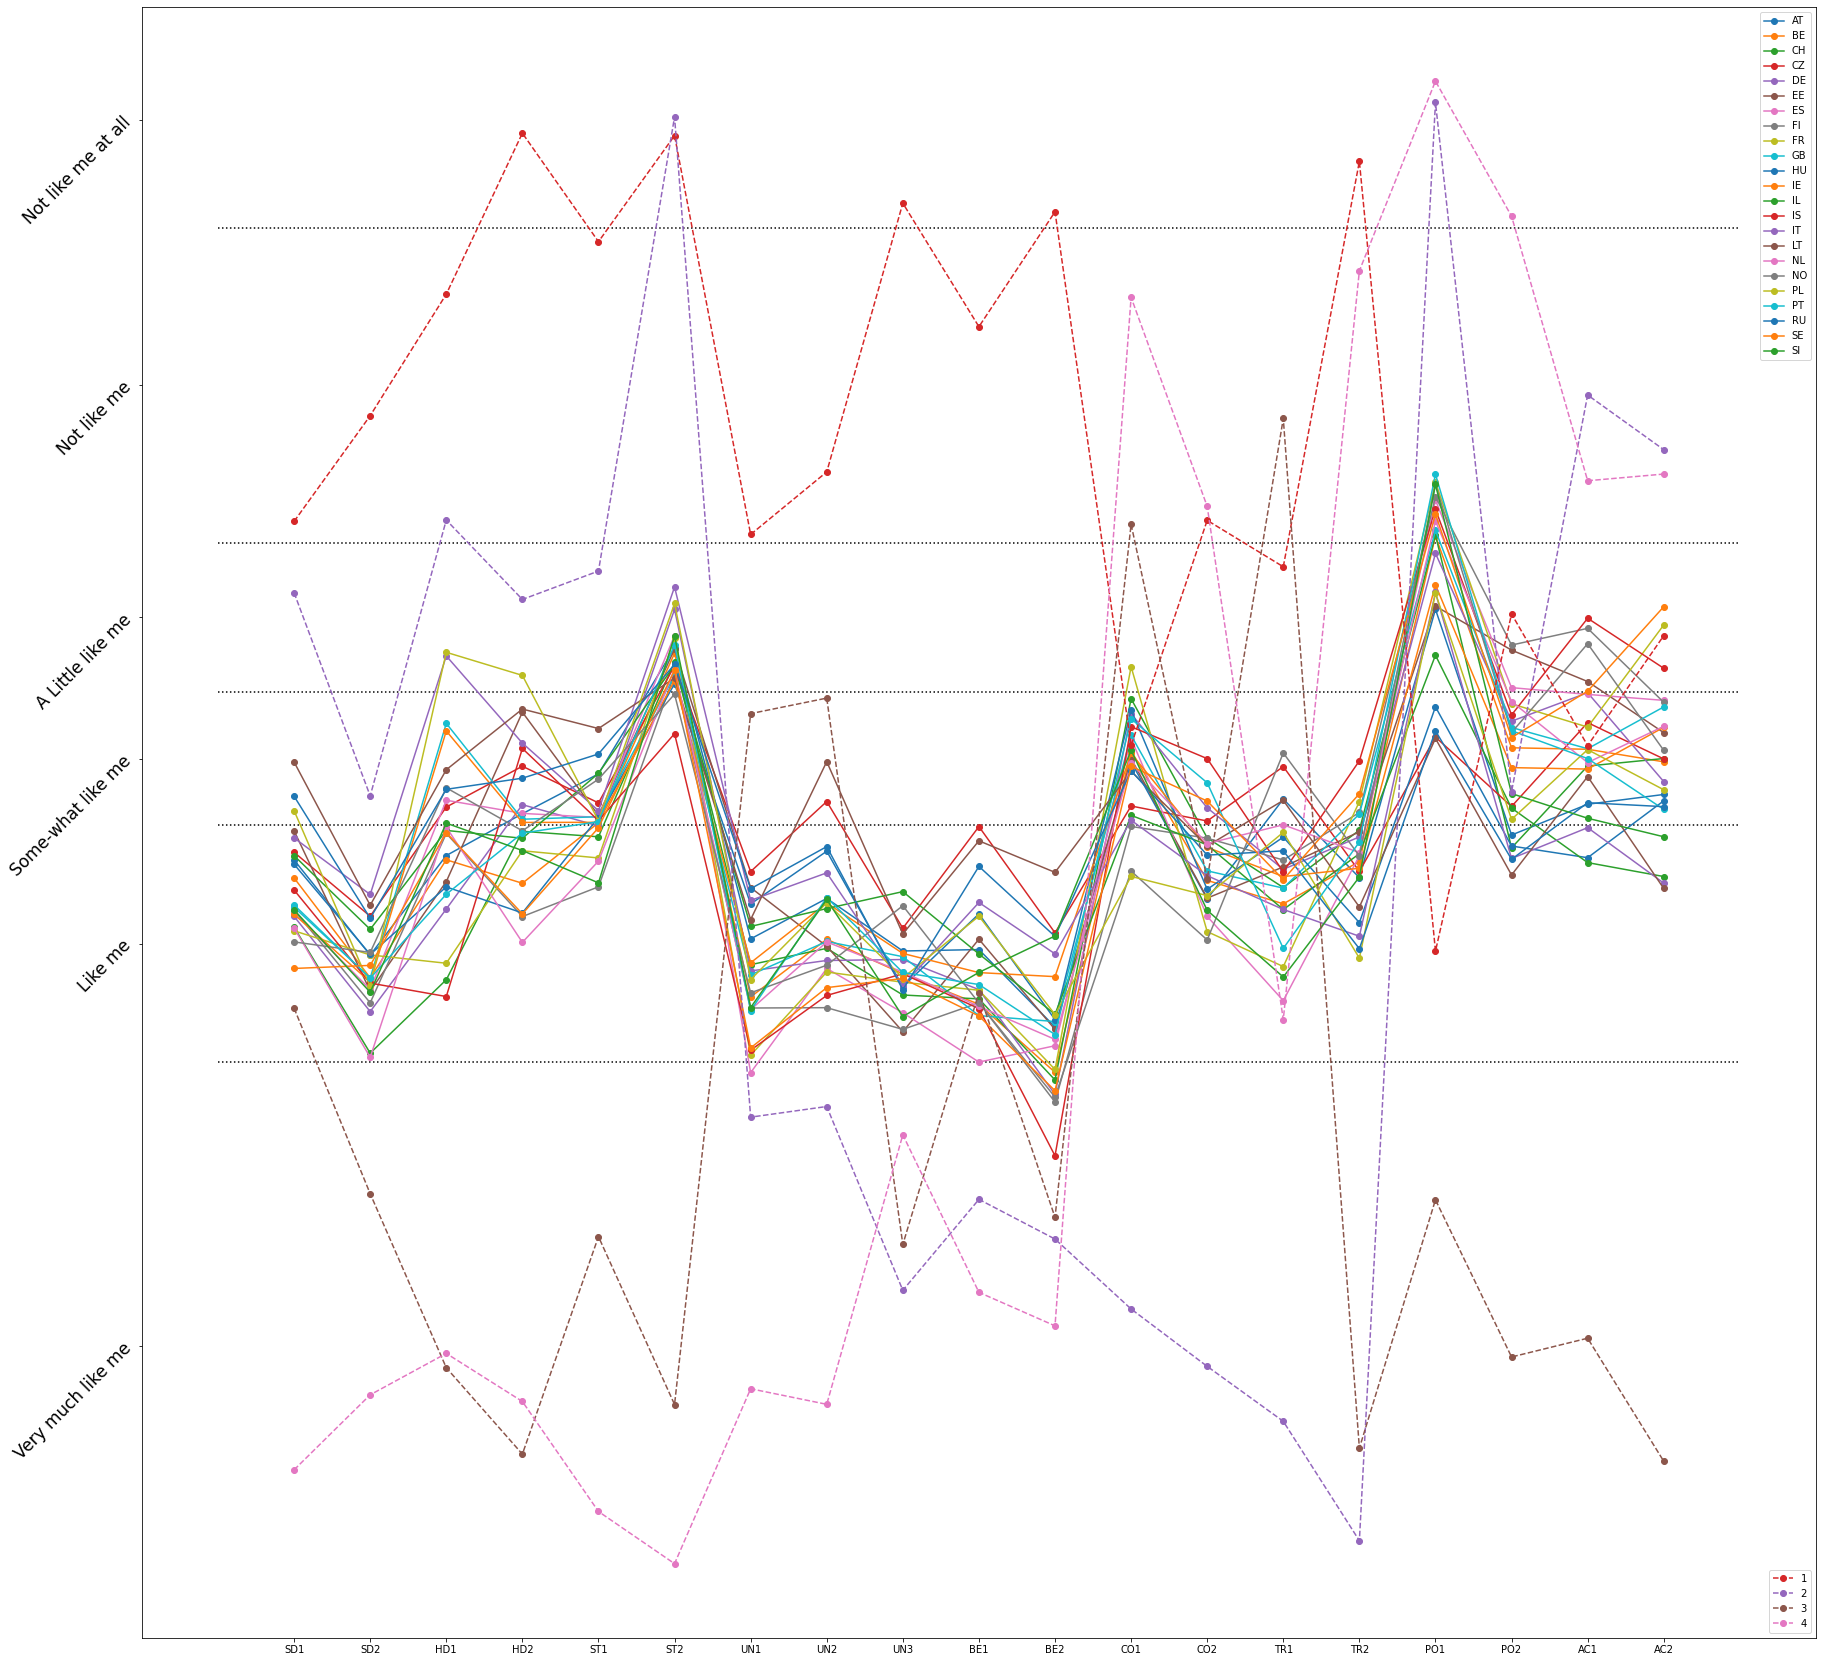

In [10]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'Country')
plot_atibutes(at,A,alpha,beta,keys,all_types)

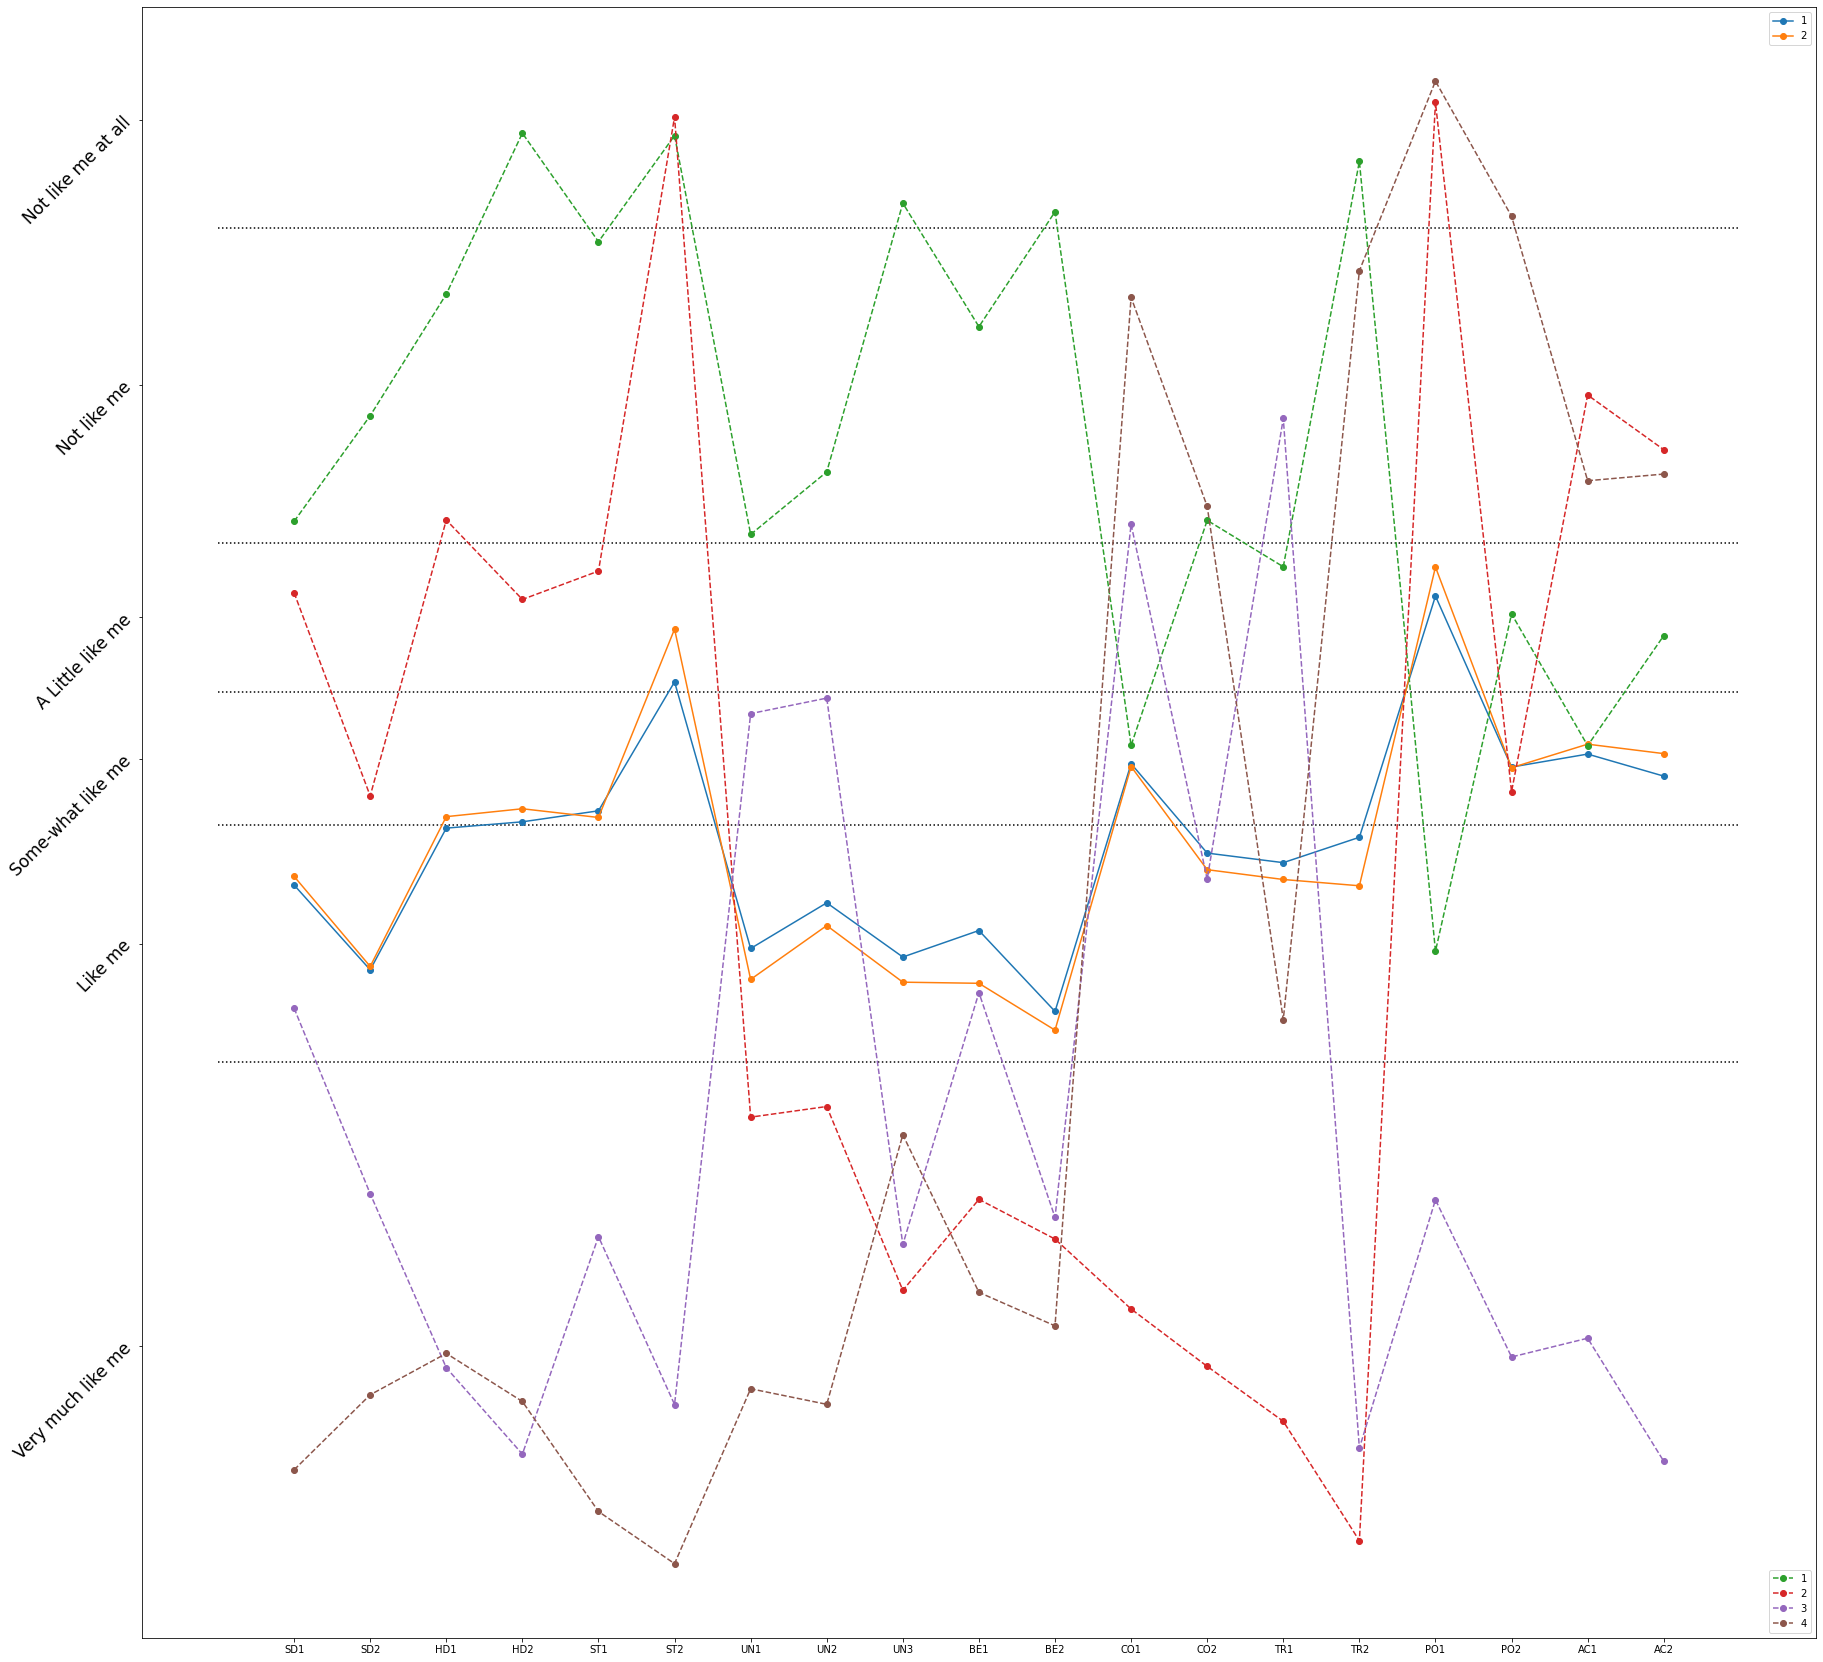

In [11]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'gender',[1,2])
plot_atibutes(at,A,alpha,beta,keys,all_types)

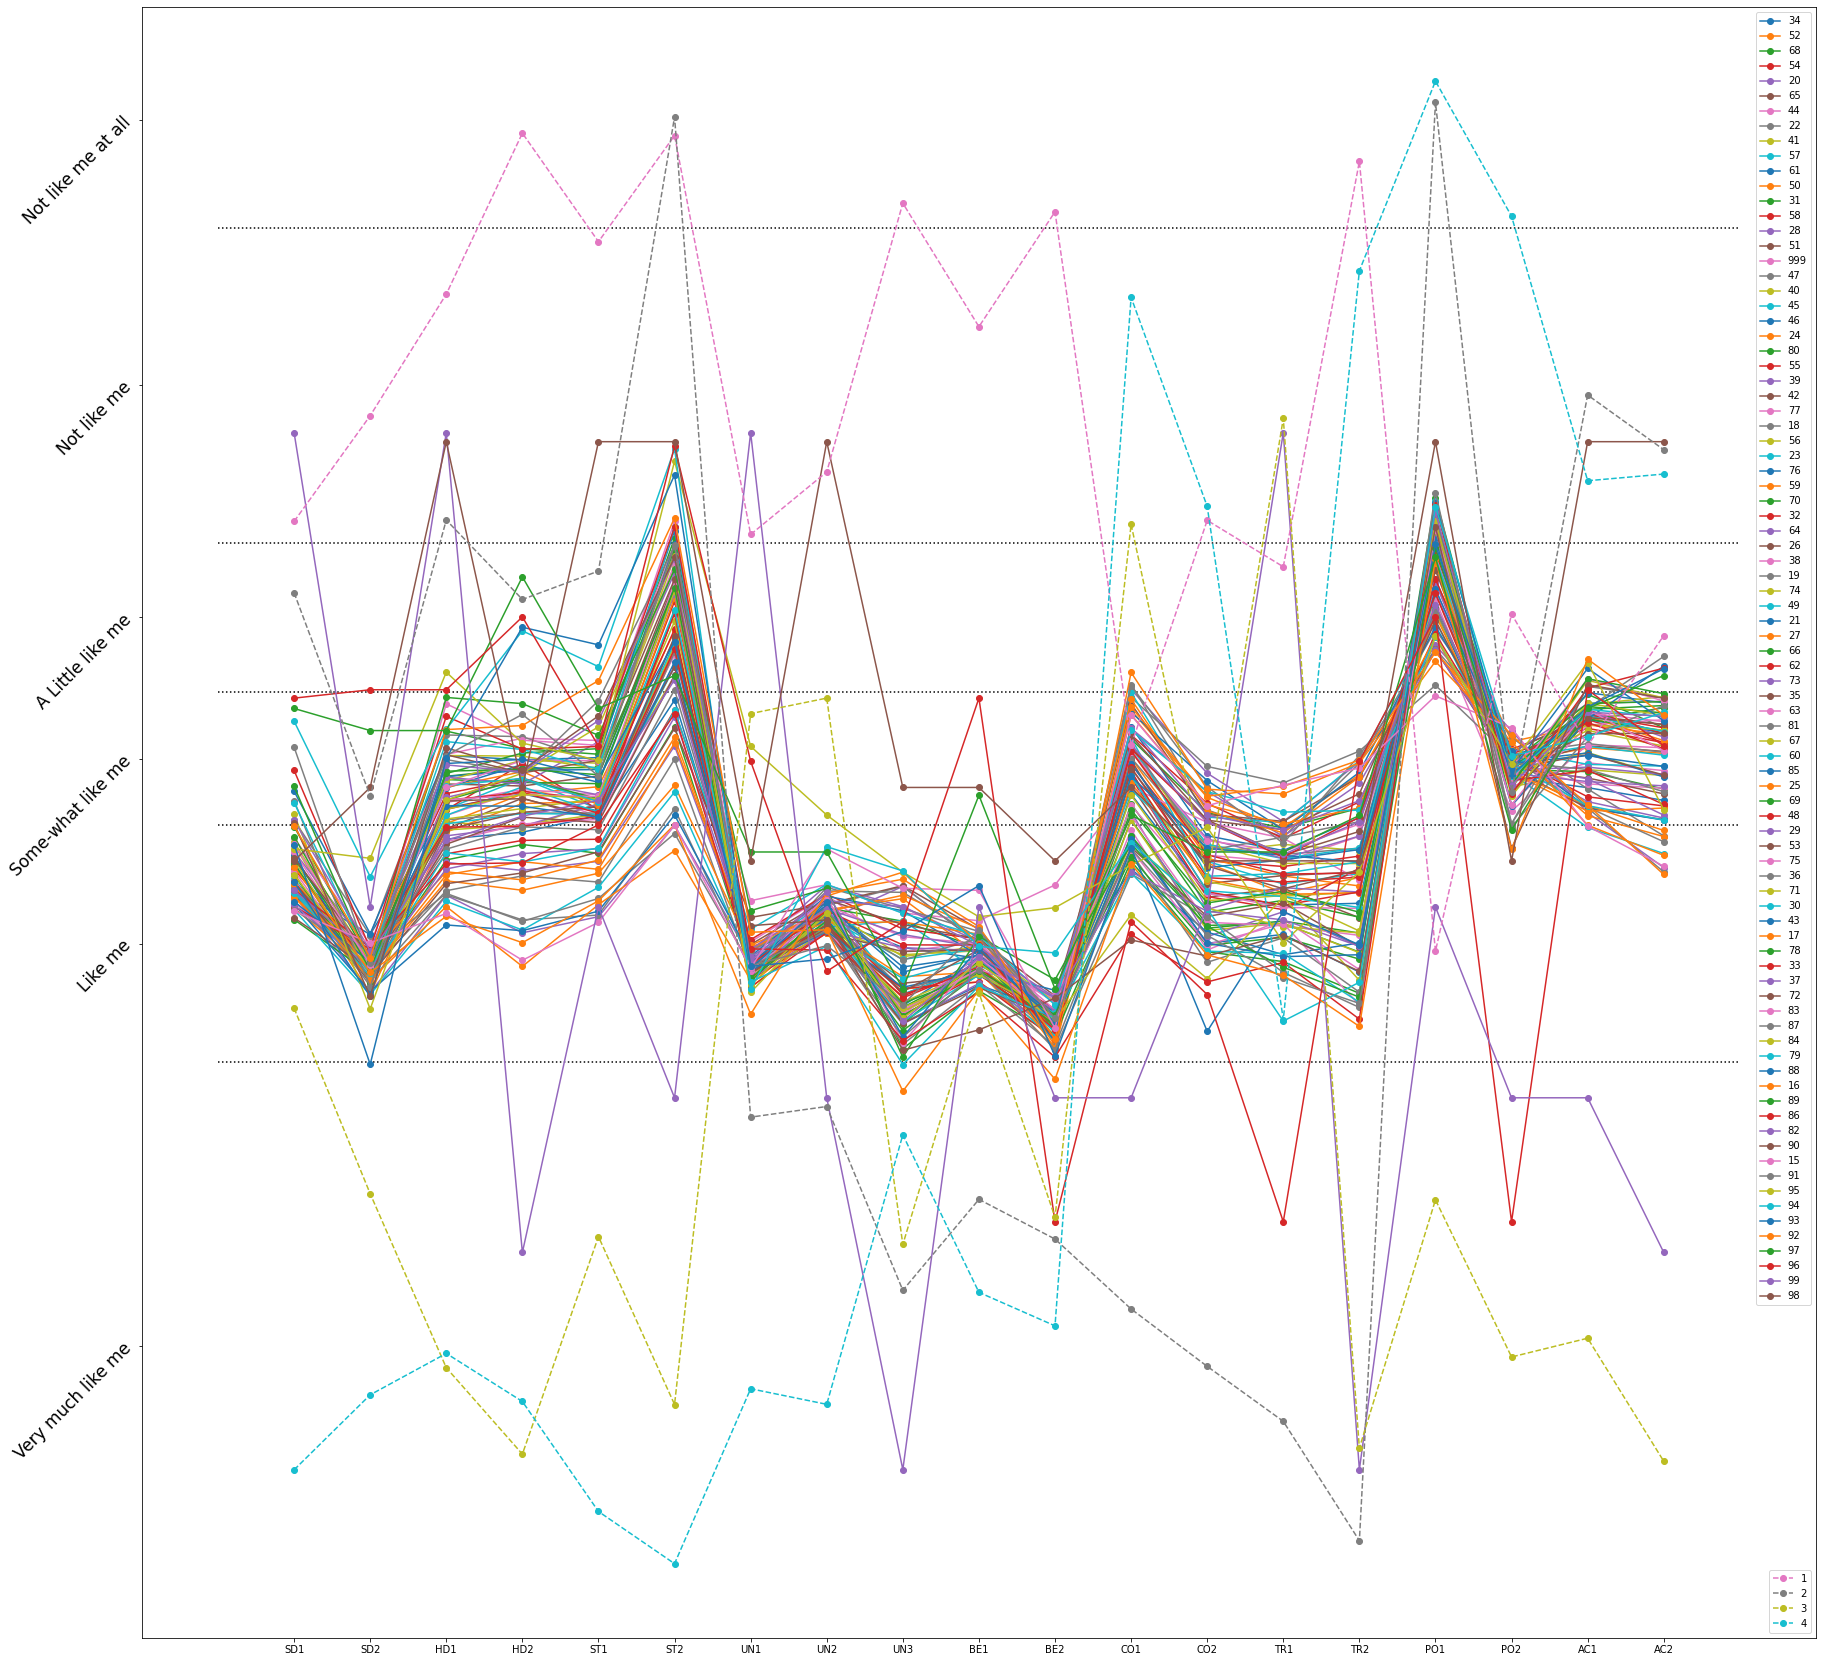

In [14]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'age')
plot_atibutes(at,A,alpha,beta,keys,all_types)

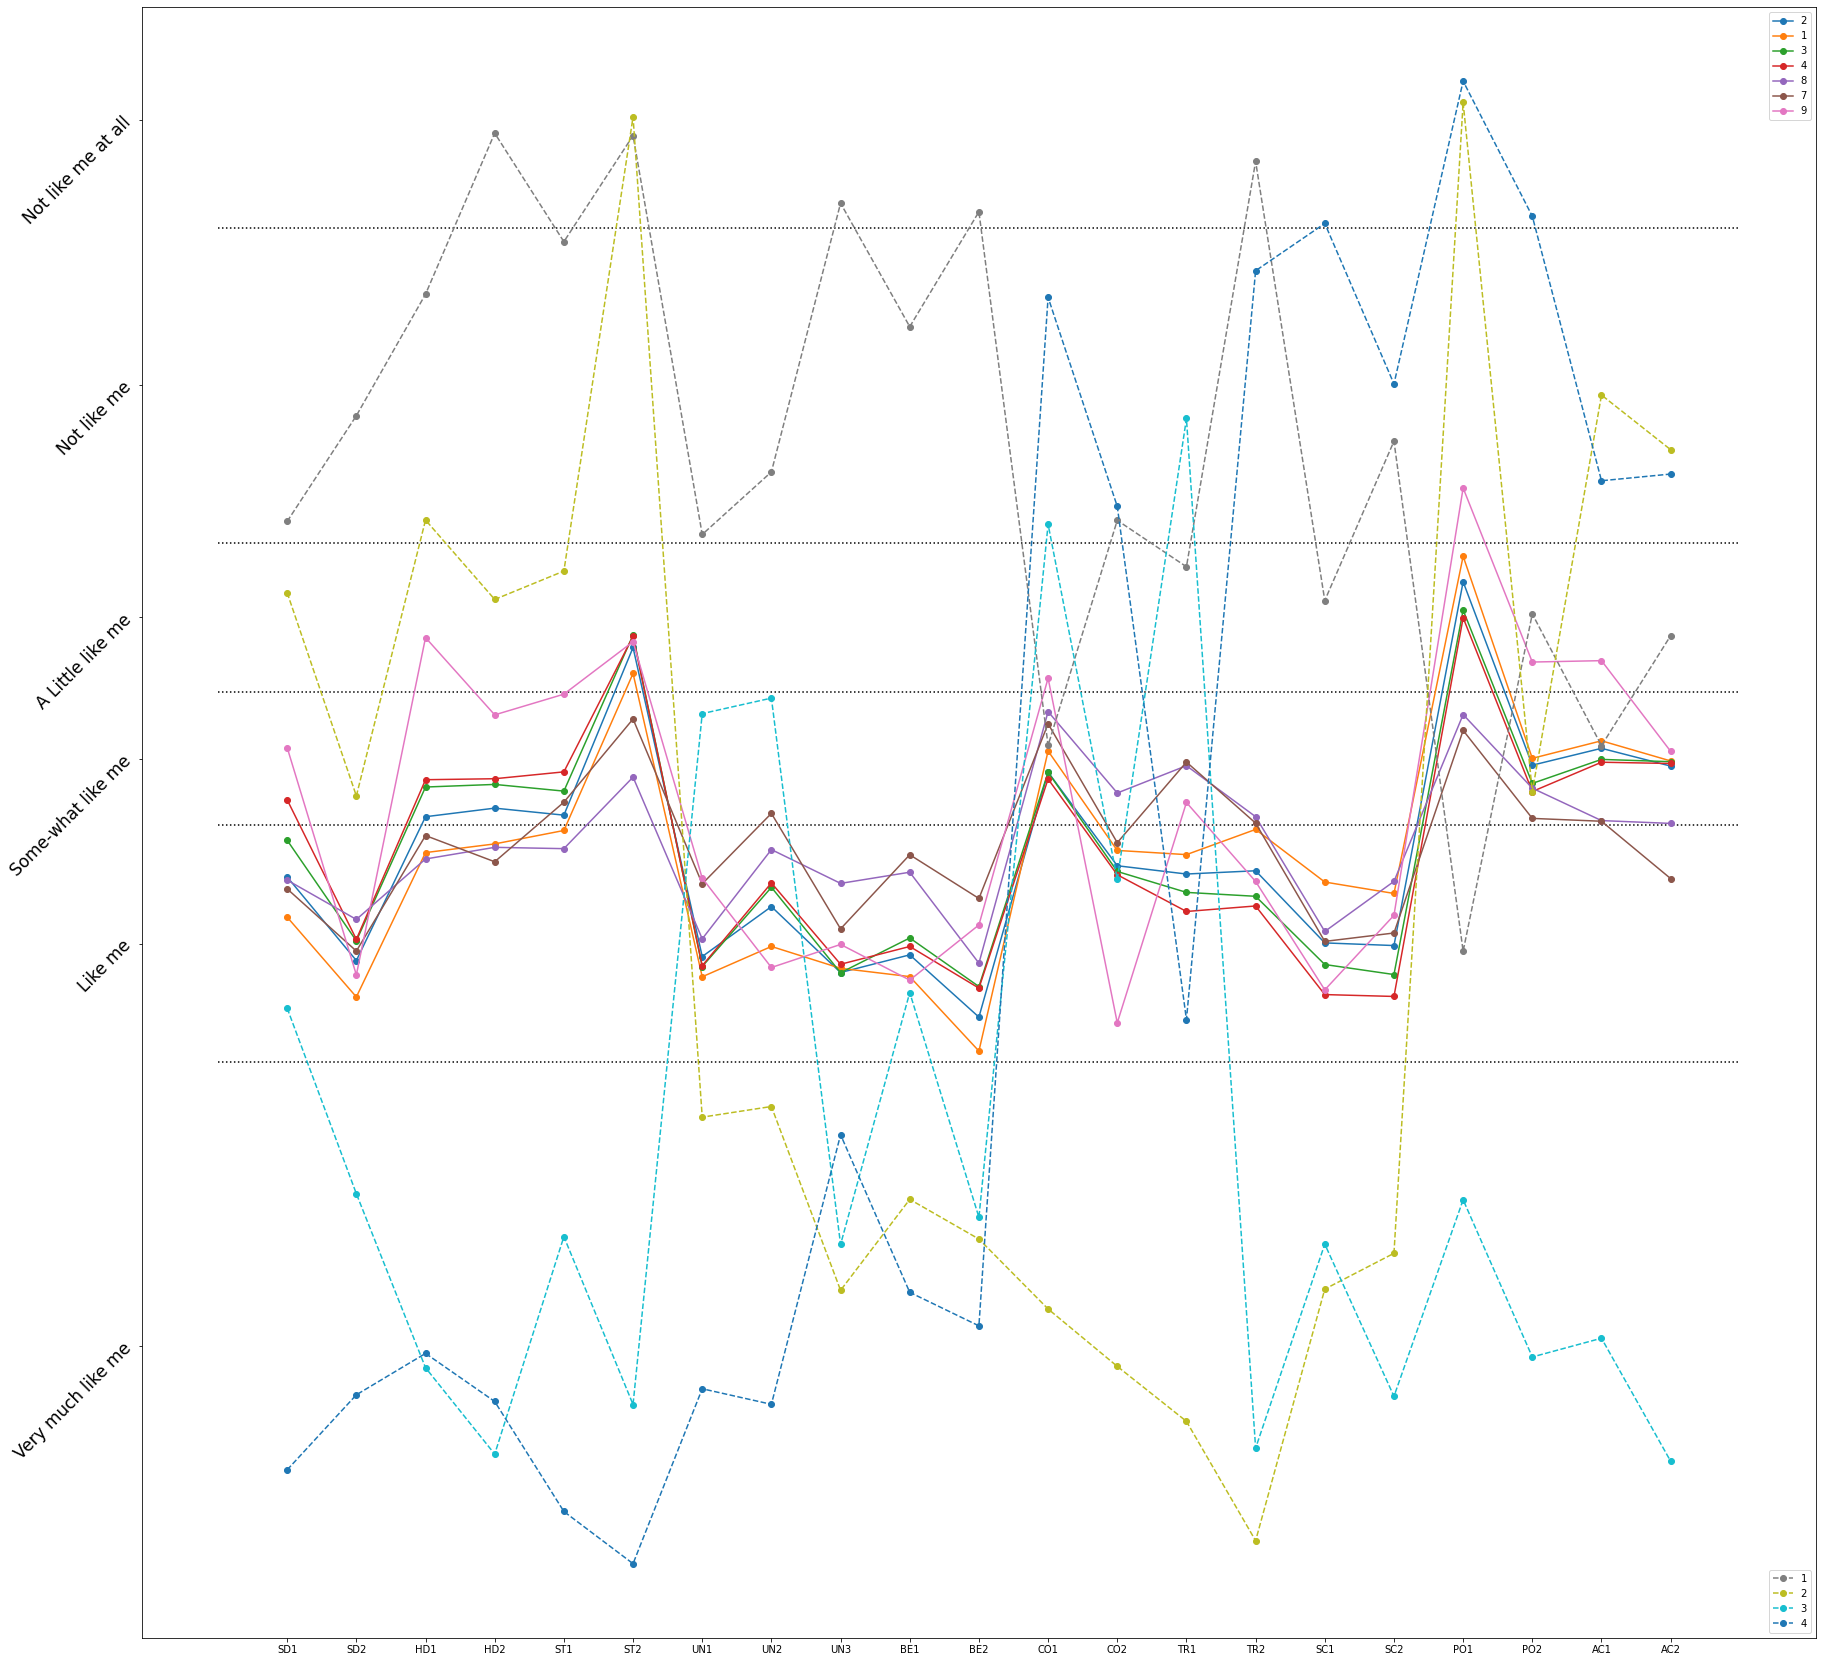

In [59]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'subjective_income')
plot_atibutes(at,A,alpha,beta,keys,all_types)

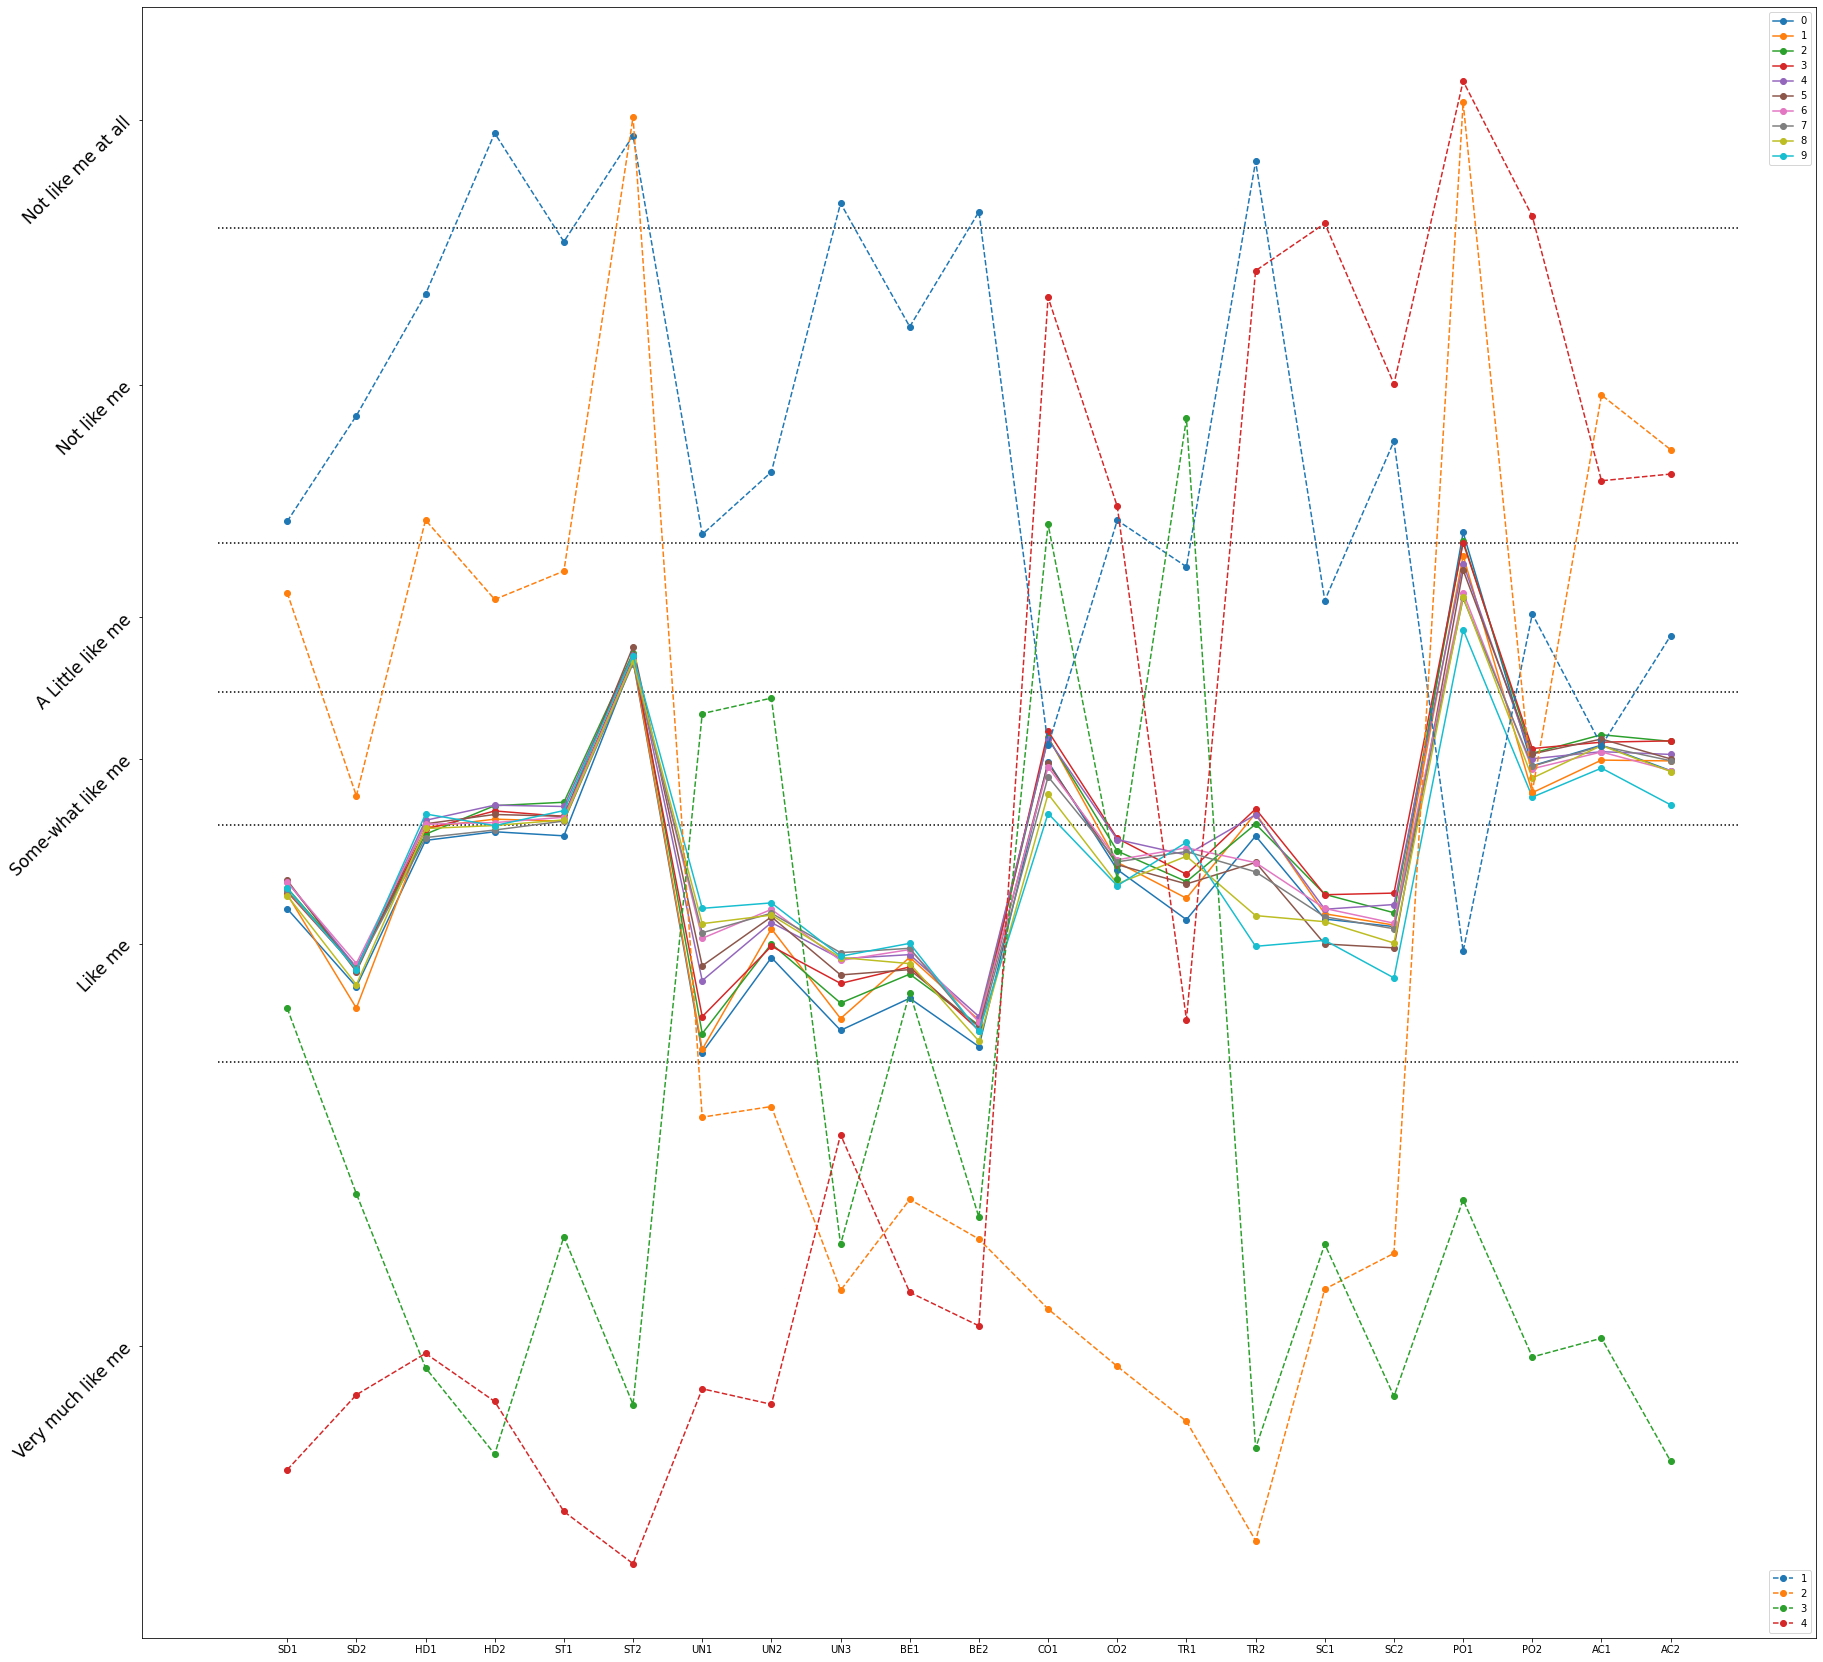

In [61]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'left_right',[0,1,2,3,4,5,6,7,8,9])
plot_atibutes(at,A,alpha,beta,keys,all_types)

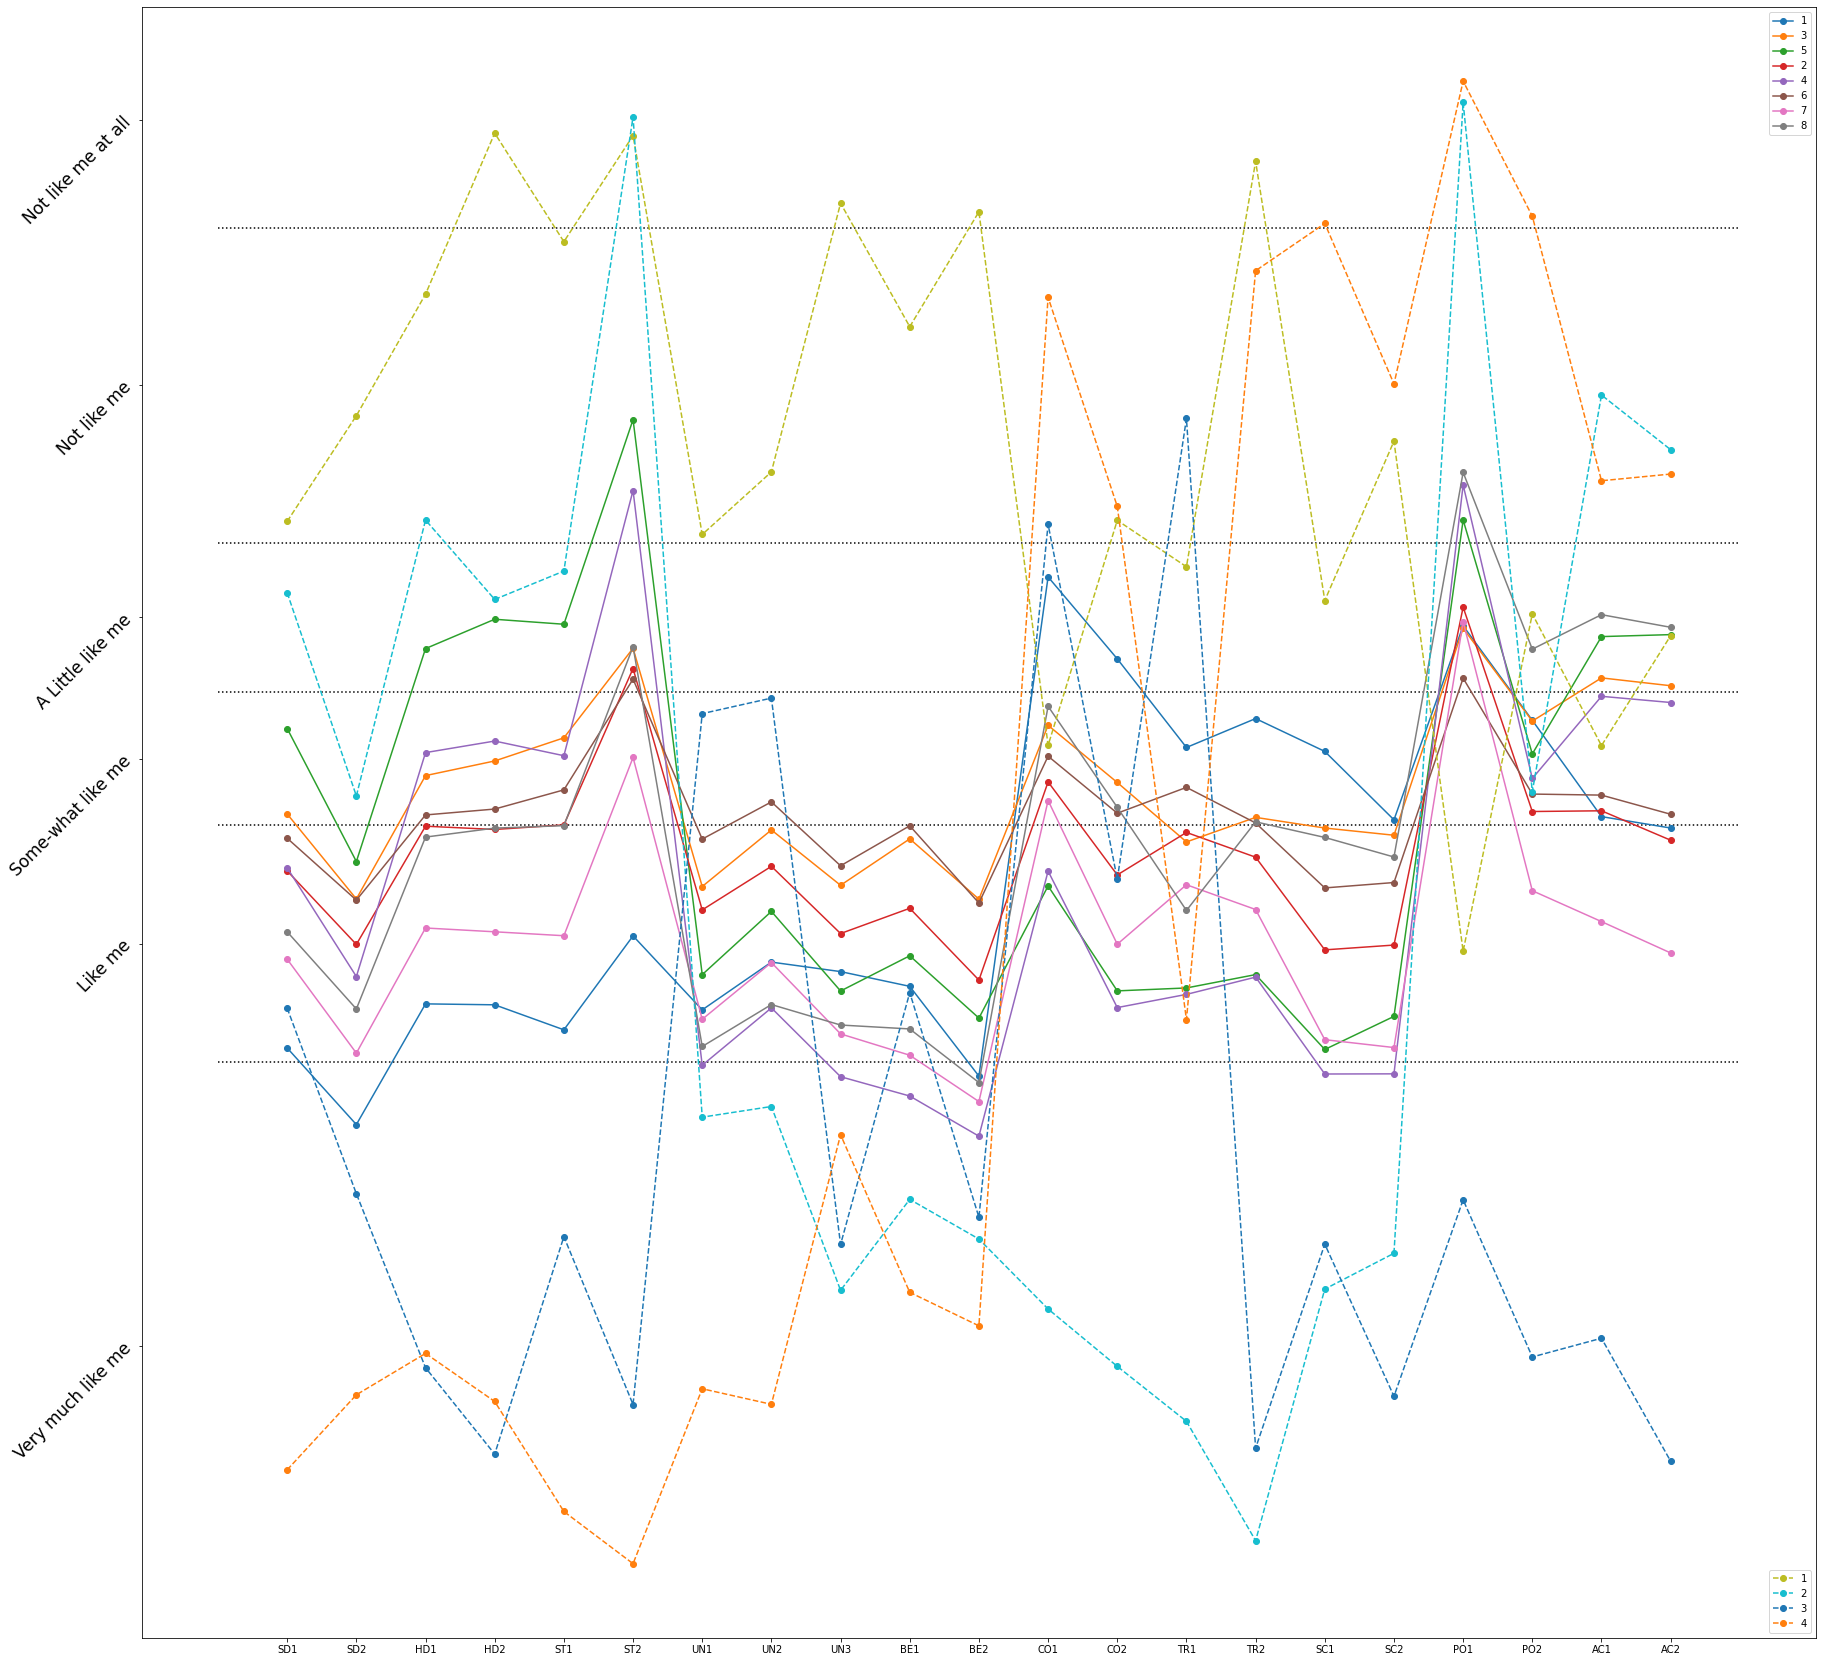

In [62]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(0)
beta=np.array(ModelData[i]['beta']).mean(0)
at=make_atribute_DF(Xhat,data_all,keys,'SBM8')
plot_atibutes(at,A,alpha,beta,keys,all_types)

In [12]:
at=make_atribute_DF(Xhat,data_all,keys,'Country')
A=np.array(ModelData[i]['A'])
cor,aMax,_=archetype_correlation(at.to_numpy(dtype="float64"),A)
pd.DataFrame(cor,index=at.index,columns=np.arange(K))

0         1         2         3
AT -0.308773  0.682549 -0.042803  0.153299
BE -0.483808  0.653140 -0.239282  0.488340
CH -0.457233  0.493917 -0.118062  0.518664
CZ -0.180716  0.646477  0.027998 -0.065150
DE -0.428483  0.572314 -0.178299  0.480973
EE -0.373280  0.682703 -0.234187  0.330897
ES -0.368459  0.736211 -0.363648  0.396481
FI -0.528280  0.606906 -0.290298  0.577690
FR -0.464201  0.591379 -0.293246  0.549834
GB -0.394277  0.666555 -0.294545  0.438938
HU -0.385586  0.558949  0.188797  0.117158
IE -0.347620  0.695546 -0.219500  0.312960
IL -0.164903  0.671223 -0.186578  0.130830
IS -0.484105  0.468357 -0.269782  0.637096
IT -0.086114  0.798878 -0.183992 -0.135088
LT  0.039136  0.603482  0.118799 -0.381006
NL -0.527740  0.504741 -0.194681  0.610728
NO -0.445582  0.637192 -0.303886  0.453122
PL -0.132145  0.824725 -0.253606 -0.049053
PT -0.444847  0.585946 -0.201282  0.492048
RU -0.174335  0.758460  0.020298 -0.176722
SE -0.498188  0.512268 -0.346762  0.667202
SI -0.350230  0.681006 -0.211955  0.308521

In [396]:
at=make_atribute_DF(Xhat,data_all,keys,'gender',[1,2])
A=np.array(ModelData[i]['A'])
cor,aMax,_=archetype_correlation(at.to_numpy(dtype="float64"),A)
pd.DataFrame(cor,index=["Man","Woman"],columns=np.arange(K))

0         1         2        3         4         5         6   \
Man    0.358225 -0.163545 -0.122857  0.21495  0.629849  0.593434  0.416521   
Woman  0.460927 -0.217128 -0.136941  0.27866  0.666211  0.539431  0.475945   

             7         8         9         10        11        12        13  \
Man   -0.435680  0.725560  0.560795  0.407746 -0.459469  0.379483  0.192947   
Woman -0.484012  0.683955  0.515214  0.509945 -0.523004  0.359215  0.205895   

             14        15        16        17        18        19  
Man    0.232101 -0.798394  0.157999 -0.375532  0.617430  0.138839  
Woman  0.258195 -0.778784  0.090730 -0.351285  0.659953  0.033846

In [397]:
at=make_atribute_DF(Xhat,data_all,keys,'education',[1,2,3,4,5,6,7])
A=np.array(ModelData[i]['A'])
cor,aMax,_=archetype_correlation(at.to_numpy(dtype="float64"),A)
pd.DataFrame(cor,index=at.index,columns=np.arange(K))

0         1         2         3         4         5         6   \
1  0.626025 -0.261581 -0.127573  0.334126  0.702265  0.535797  0.544120   
2  0.525101 -0.235775 -0.129667  0.267261  0.678496  0.546440  0.507861   
3  0.424038 -0.192070 -0.114661  0.231807  0.673097  0.523715  0.485456   
4  0.425128 -0.179747 -0.129642  0.257730  0.643445  0.547549  0.444153   
5  0.389522 -0.195500 -0.122926  0.226546  0.626008  0.576057  0.435532   
6  0.251862 -0.131760 -0.146391  0.187893  0.591387  0.598316  0.365335   
7  0.236720 -0.147890 -0.141158  0.242078  0.578705  0.581851  0.323194   

         7         8         9         10        11        12        13  \
1 -0.594980  0.590919  0.430870  0.651351 -0.621308  0.246161  0.195284   
2 -0.512140  0.683352  0.519969  0.545570 -0.540754  0.297675  0.185047   
3 -0.436935  0.716273  0.565996  0.463402 -0.490073  0.355513  0.163831   
4 -0.462253  0.721505  0.551404  0.456942 -0.478513  0.347605  0.196537   
5 -0.460946  0.716078  0.548177  0.456314 -0.484235  0.386180  0.199497   
6 -0.367847  0.729285  0.559577  0.326035 -0.437350  0.443984  0.203107   
7 -0.380842  0.666679  0.489434  0.332048 -0.396712  0.474028  0.254435   

         14        15        16        17        18        19  
1  0.334145 -0.720456  0.028536 -0.256650  0.636957 -0.171739  
2  0.284068 -0.769763  0.071322 -0.330775  0.634044 -0.032683  
3  0.236472 -0.794771  0.138275 -0.350571  0.609646  0.036153  
4  0.246966 -0.798737  0.137352 -0.380208  0.631053  0.079736  
5  0.205199 -0.778803  0.145526 -0.344695  0.635818  0.096606  
6  0.197737 -0.778825  0.153664 -0.412611  0.634073  0.262525  
7  0.213686 -0.783161  0.134823 -0.411496  0.666902  0.279815

In [392]:
at=make_atribute_DF(Xhat,data_all,keys,'left_right',[0,1,2,3,4,5,6,7,8,9,10])
A=np.array(ModelData[i]['A'])
cor,aMax,_=archetype_correlation(at.to_numpy(dtype="float64"),A)
pd.DataFrame(cor,index=at.index,columns=np.arange(K))

0         1         2         3
0  -0.406360  0.665138 -0.289429  0.460266
1  -0.366820  0.630237 -0.253064  0.435429
2  -0.402355  0.656865 -0.275569  0.456094
3  -0.410798  0.624572 -0.268011  0.490601
4  -0.385913  0.641585 -0.230264  0.429641
5  -0.393397  0.720567 -0.224608  0.348170
6  -0.420532  0.690791 -0.179762  0.366894
7  -0.430722  0.694285 -0.181575  0.369942
8  -0.426452  0.736032 -0.171875  0.307288
9  -0.366870  0.766111 -0.107523  0.161525
10 -0.352759  0.802178 -0.170206  0.164117

In [355]:
beta=np.array(ModelData[i]['S'])
at=make_scale_DF(beta,data_all,'A')
at

0         1         2         3
5   0.316599  0.263114  0.228654  0.191633
10  0.325161  0.250799    0.2276  0.196439
0   0.303401  0.280443  0.247748  0.168409
7   0.328689  0.243987  0.234703  0.192621
8   0.321753    0.2494  0.233731  0.195116
9   0.332917   0.24025  0.231887  0.194946
3   0.319563  0.259615  0.242137  0.178685
1   0.315419  0.274843  0.243289  0.166449
2   0.315412  0.267912  0.238997  0.177679
6   0.329235   0.24759   0.23442  0.188755
4   0.318301   0.25921  0.235573  0.186916
88  0.328057   0.27738  0.239005  0.155558
77  0.330791  0.258392  0.243893  0.166923
99  0.461283  0.219647  0.204459  0.114611

In [321]:
a.shape

(4, 23)

In [316]:
data[]

In [372]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'Country')
at

0         1         2         3         4         5    6
AT  0.0  0.374531  0.494201  0.582744  0.710329  0.865283  1.0
BE  0.0  0.330929  0.503253  0.589792  0.703876  0.890405  1.0
CH  0.0  0.397908  0.515651  0.578096  0.653233   0.86041  1.0
CZ  0.0  0.301921  0.469437  0.596463  0.741319  0.910673  1.0
DE  0.0  0.393068  0.505924  0.558615  0.613044  0.825889  1.0
EE  0.0  0.301531  0.479757  0.552535  0.625958  0.852879  1.0
ES  0.0   0.39745  0.520607  0.575827  0.645997  0.853512  1.0
FI  0.0  0.339654  0.480259  0.558558  0.644425  0.837902  1.0
FR  0.0  0.367089  0.479978  0.534754  0.597635  0.789372  1.0
GB  0.0  0.358541  0.502464    0.5627  0.636524  0.867088  1.0
HU  0.0  0.364902  0.523459  0.631318  0.740928  0.893879  1.0
IE  0.0  0.347966  0.504889  0.582264  0.666334  0.858215  1.0
IL  0.0  0.427356  0.551819  0.644291  0.742467  0.904236  1.0
IS  0.0  0.370187  0.485823  0.546893  0.617776  0.872178  1.0
IT  0.0  0.343481  0.495561  0.611154  0.738557   0.87497  1.0
LT  0.0   0.30858  0.457323  0.567512  0.698922  0.889544  1.0
NL  0.0  0.316465   0.49281  0.567771  0.660629  0.861053  1.0
NO  0.0  0.314061  0.483245  0.554114  0.639345  0.907467  1.0
PL  0.0  0.352012  0.515962  0.595245  0.689387  0.888831  1.0
PT  0.0  0.340836  0.469781  0.552441  0.616587  0.839173  1.0
RU  0.0   0.31933  0.482879  0.598055  0.706085  0.879517  1.0
SE  0.0  0.336613  0.486103  0.561109  0.640807    0.8654  1.0
SI  0.0  0.378789  0.545747  0.621145  0.681311  0.882928  1.0

In [378]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'gender')
at

0         1         2         3         4         5    6
2  0.0  0.410168  0.502372  0.550289  0.609995  0.768745  1.0
1  0.0  0.405174  0.506222  0.557276  0.623447  0.790696  1.0
9  0.0  0.469106  0.516463   0.52607  0.542183  0.753807  1.0

In [261]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'age')
at

0         1         2         3         4         5    6
34  0.0  0.333997  0.477261  0.565548  0.662334  0.872083  1.0
52  0.0  0.321576  0.459328  0.541356  0.635292  0.849286  1.0
68  0.0  0.313207  0.454221  0.528213  0.610557  0.824355  1.0
54  0.0  0.326623  0.465152  0.541572  0.634393  0.846755  1.0
20  0.0  0.331388  0.481991  0.586776  0.707997  0.901277  1.0
..  ...       ...       ...       ...       ...       ...  ...
92  0.0  0.332858  0.457492  0.515259  0.565855  0.767255  1.0
97  0.0  0.330697   0.58419  0.622337  0.648185  0.756298  1.0
96  0.0   0.46773  0.521653  0.593912  0.753508  0.821322  1.0
99  0.0  0.166738  0.247257  0.388611  0.523398  0.981285  1.0
98  0.0  0.067711  0.419764  0.475418  0.506558   0.98882  1.0

[86 rows x 7 columns]

In [357]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'Country')
at

0         1         2         3         4         5    6
AT  0.0  0.374531  0.494201  0.582744  0.710329  0.865283  1.0
BE  0.0  0.330929  0.503253  0.589792  0.703876  0.890405  1.0
CH  0.0  0.397908  0.515651  0.578096  0.653233   0.86041  1.0
CZ  0.0  0.301921  0.469437  0.596463  0.741319  0.910673  1.0
DE  0.0  0.393068  0.505924  0.558615  0.613044  0.825889  1.0
EE  0.0  0.301531  0.479757  0.552535  0.625958  0.852879  1.0
ES  0.0   0.39745  0.520607  0.575827  0.645997  0.853512  1.0
FI  0.0  0.339654  0.480259  0.558558  0.644425  0.837902  1.0
FR  0.0  0.367089  0.479978  0.534754  0.597635  0.789372  1.0
GB  0.0  0.358541  0.502464    0.5627  0.636524  0.867088  1.0
HU  0.0  0.364902  0.523459  0.631318  0.740928  0.893879  1.0
IE  0.0  0.347966  0.504889  0.582264  0.666334  0.858215  1.0
IL  0.0  0.427356  0.551819  0.644291  0.742467  0.904236  1.0
IS  0.0  0.370187  0.485823  0.546893  0.617776  0.872178  1.0
IT  0.0  0.343481  0.495561  0.611154  0.738557   0.87497  1.0
LT  0.0   0.30858  0.457323  0.567512  0.698922  0.889544  1.0
NL  0.0  0.316465   0.49281  0.567771  0.660629  0.861053  1.0
NO  0.0  0.314061  0.483245  0.554114  0.639345  0.907467  1.0
PL  0.0  0.352012  0.515962  0.595245  0.689387  0.888831  1.0
PT  0.0  0.340836  0.469781  0.552441  0.616587  0.839173  1.0
RU  0.0   0.31933  0.482879  0.598055  0.706085  0.879517  1.0
SE  0.0  0.336613  0.486103  0.561109  0.640807    0.8654  1.0
SI  0.0  0.378789  0.545747  0.621145  0.681311  0.882928  1.0

In [97]:
data_all[data_all.loc[:,'gender']==9]

ID Country  left_right  immigrants  homosexual  Satisfy_life  \
26100  5972      IS           4           5           1             8   
26168  6726      IS           5           8           2            10   
26392  9310      IS          10           2           1             8   

       Satisfy_health  Attitude2EU  gender  age  ...  PO_CFA  AC_CFA  UN_CFA  \
26100               2            4       9   24  ...   -0.24    0.08    0.66   
26168               1            2       9   74  ...   -1.03   -0.76    0.25   
26392               1            0       9   46  ...   -1.01   -1.56    0.51   

       BE_CFA  SBM8  SBM9  SBM16  LCA5  LCA8  LCA16  
26100    0.82     1     7      8     5     3     14  
26168    0.22     8     9      7     2     4     10  
26392    0.52     4     8      6     3     7      7  

[3 rows x 49 columns]

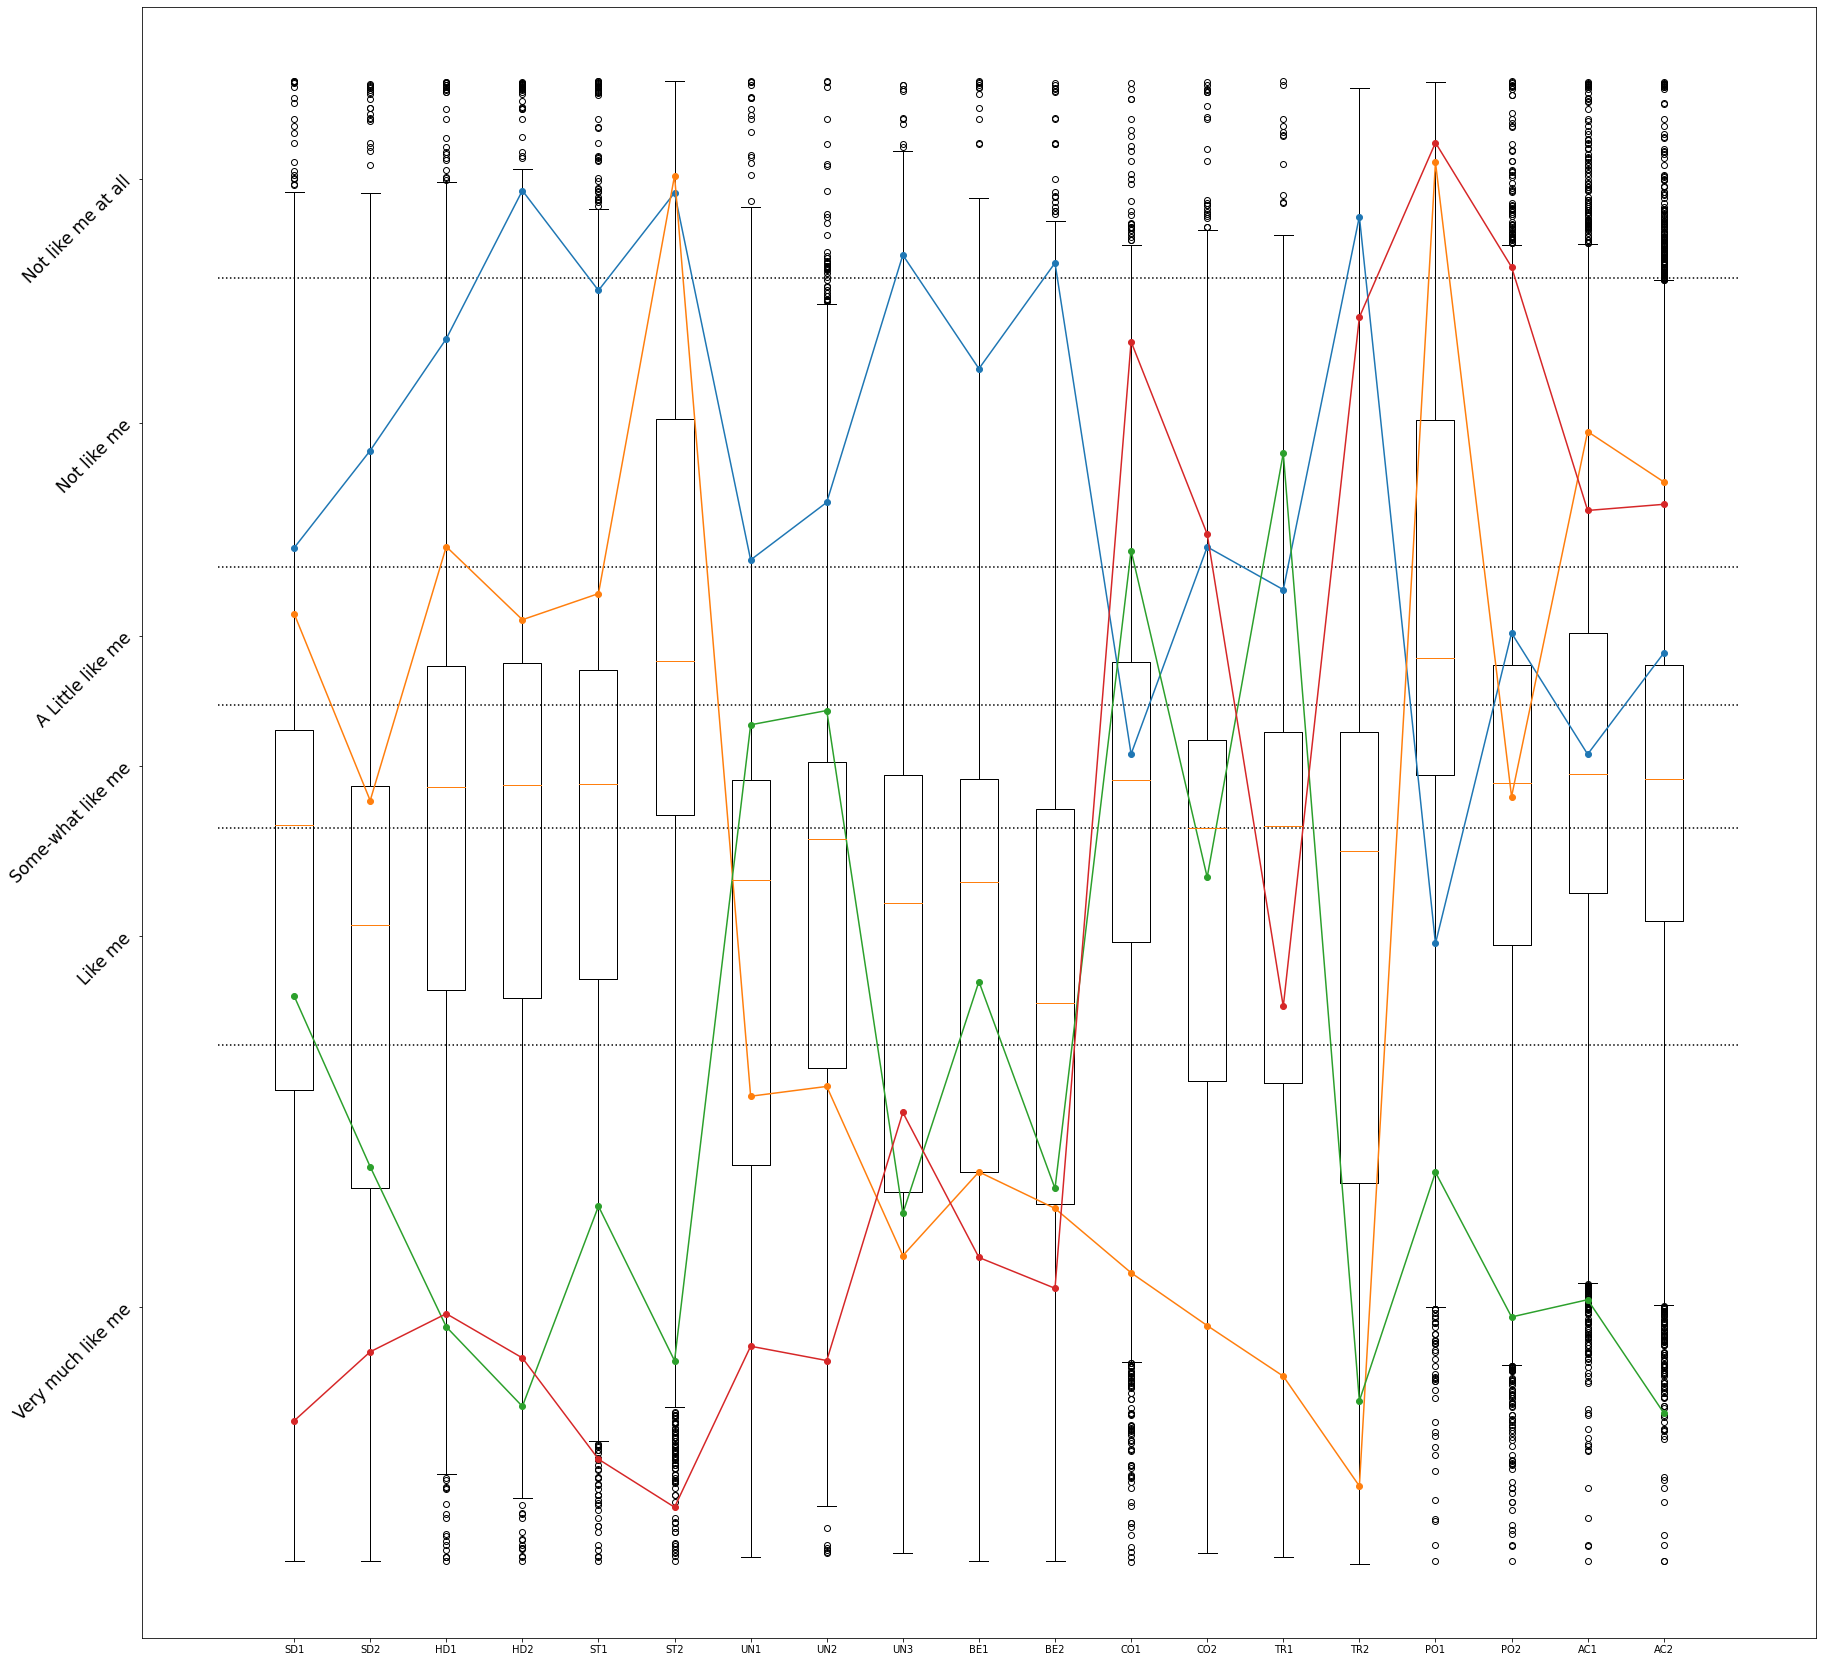

In [283]:
Xhat=np.array(ModelData[i]['Xtilde'])[index]
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(axis=0)
beta=np.array(ModelData[i]['beta']).mean(axis=0)
plot_types(Xhat,A,alpha,beta,keys,all_types)

In [66]:
np.array(ModelData[i]['beta'])[index].mean(axis=0)

array([0.        , 0.3361505 , 0.47337559, 0.54738096, 0.63654103,
       0.85248939, 0.99999999])

In [67]:
np.array(ModelData[i]['beta']).mean(axis=0)

array([0.        , 0.32712018, 0.46972662, 0.55232247, 0.64743159,
       0.85273704, 0.99999999])

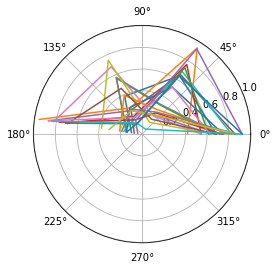

In [365]:
ax = plt.subplot(projection='polar')
r=1
ax.set_rsticks=(np.arange(21))
ax.plot(A)
plt.show()

NameError: name 'markers' is not defined

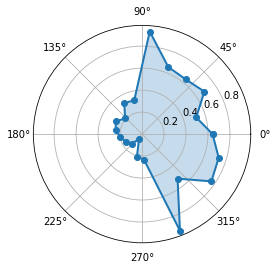

In [56]:

labels = np.array(all)
stats=A[1,all_types].tolist()
len(stats)
angles = np.linspace(0, 2*np.pi, len(keys), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, A[1,all_types].tolist())
plt.yticks(markers)
ax.set_title(name)
ax.grid(True)
plt.show()

In [49]:
print(len(A[1,all_types]))
print(len(keys))
print(len(keys[all_types]))

21
21
21
